# Bike Hiring case study by Manual elimination

## Problem statement

A US bike-sharing provider BoomBikes has recently suffered considerable dips in their revenues due to the ongoing Corona pandemic. The company is finding it very difficult to sustain in the current market scenario. So, it has decided to come up with a mindful business plan to be able to accelerate its revenue as soon as the ongoing lockdown comes to an end, and the economy restores to a healthy state. 

BoomBikes aspires to understand the demand for shared bikes among the people after this ongoing quarantine situation ends across the nation due to Covid-19. They have planned this to prepare themselves to cater to the people's needs once the situation gets better all around and stand out from other service providers and make huge profits.

The company wants to know:

Which variables are significant in predicting the demand for shared bikes.
How well those variables describe the bike demands


## Reading and understanding the data

Let us first import NumPy and Pandas and read the Bike hiring dataset

In [88]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import statsmodels.api as sm
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [2]:
bike = pd.read_csv("day.csv")

In [3]:
# Check the head of the dataset
bike.head()

instant      dteday  season  yr  mnth  holiday  weekday  workingday  \
0        1  01-01-2018       1   0     1        0        6           0   
1        2  02-01-2018       1   0     1        0        0           0   
2        3  03-01-2018       1   0     1        0        1           1   
3        4  04-01-2018       1   0     1        0        2           1   
4        5  05-01-2018       1   0     1        0        3           1   

   weathersit       temp     atemp      hum  windspeed  casual  registered  \
0           2  14.110847  18.18125  80.5833  10.749882     331         654   
1           2  14.902598  17.68695  69.6087  16.652113     131         670   
2           1   8.050924   9.47025  43.7273  16.636703     120        1229   
3           1   8.200000  10.60610  59.0435  10.739832     108        1454   
4           1   9.305237  11.46350  43.6957  12.522300      82        1518   

    cnt  
0   985  
1   801  
2  1349  
3  1562  
4  1600

In [4]:
bike.shape

(730, 16)

In [5]:
bike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [6]:
bike.describe()

instant      season          yr        mnth     holiday     weekday  \
count  730.000000  730.000000  730.000000  730.000000  730.000000  730.000000   
mean   365.500000    2.498630    0.500000    6.526027    0.028767    2.997260   
std    210.877136    1.110184    0.500343    3.450215    0.167266    2.006161   
min      1.000000    1.000000    0.000000    1.000000    0.000000    0.000000   
25%    183.250000    2.000000    0.000000    4.000000    0.000000    1.000000   
50%    365.500000    3.000000    0.500000    7.000000    0.000000    3.000000   
75%    547.750000    3.000000    1.000000   10.000000    0.000000    5.000000   
max    730.000000    4.000000    1.000000   12.000000    1.000000    6.000000   

       workingday  weathersit        temp       atemp         hum   windspeed  \
count  730.000000  730.000000  730.000000  730.000000  730.000000  730.000000   
mean     0.683562    1.394521   20.319259   23.726322   62.765175   12.763620   
std      0.465405    0.544807    7.506729    8.150308   14.237589    5.195841   
min      0.000000    1.000000    2.424346    3.953480    0.000000    1.500244   
25%      0.000000    1.000000   13.811885   16.889713   52.000000    9.041650   
50%      1.000000    1.000000   20.465826   24.368225   62.625000   12.125325   
75%      1.000000    2.000000   26.880615   30.445775   72.989575   15.625589   
max      1.000000    3.000000   35.328347   42.044800   97.250000   34.000021   

            casual   registered          cnt  
count   730.000000   730.000000   730.000000  
mean    849.249315  3658.757534  4508.006849  
std     686.479875  1559.758728  1936.011647  
min       2.000000    20.000000    22.000000  
25%     316.250000  2502.250000  3169.750000  
50%     717.000000  3664.500000  4548.500000  
75%    1096.500000  4783.250000  5966.000000  
max    3410.000000  6946.000000  8714.000000

## Visualising the Data

We'll visualise our data using matplotlib and seaborn.

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

Lets visualise numerical variables

<Figure size 3000x1600 with 0 Axes>

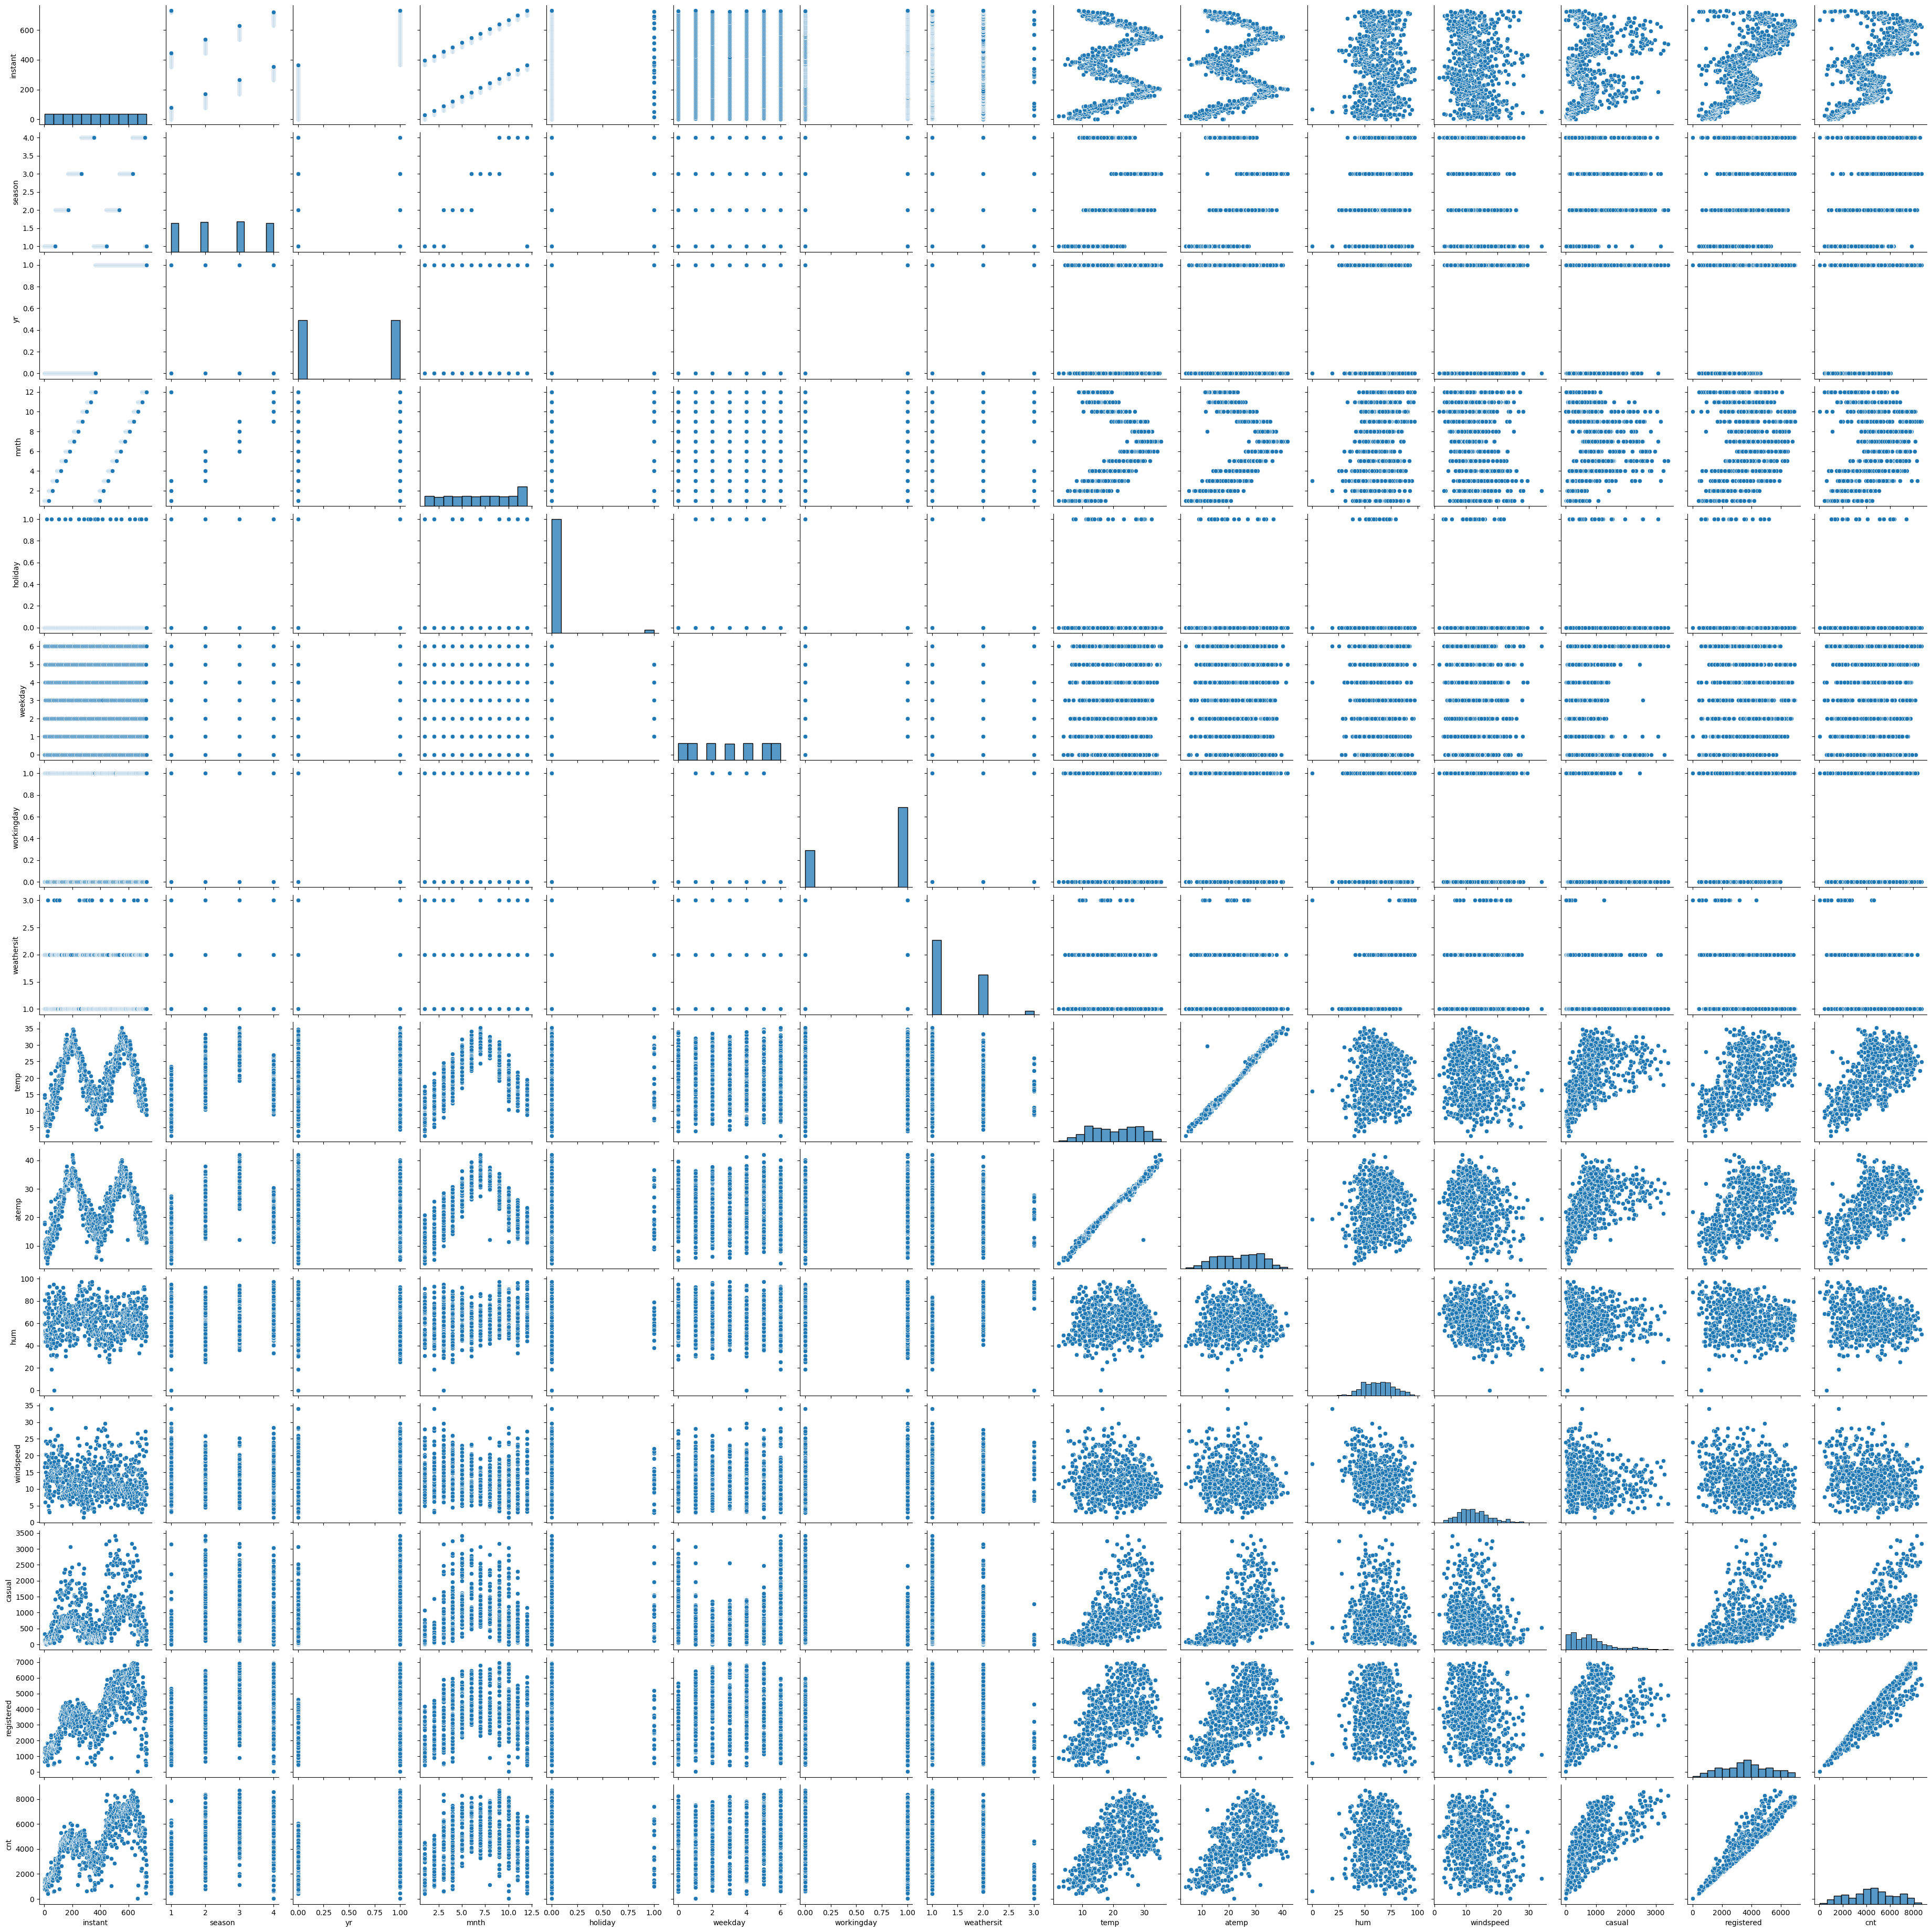

In [8]:
plt.figure(figsize=(30, 16))
sns.pairplot(bike)
plt.show()

There are no categorical variables to visualize for now

## Data Preparation

Notice that column 'instant' is just used for indexing and doesnt affect the analysis. So we can drop it.
Also column 'dteday' is not needed as the there are columns for month and year in the dataset. So dropping it too.

In [9]:
bike.pop('instant')

0        1
1        2
2        3
3        4
4        5
      ... 
725    726
726    727
727    728
728    729
729    730
Name: instant, Length: 730, dtype: int64

In [10]:
bike.pop('dteday')

0      01-01-2018
1      02-01-2018
2      03-01-2018
3      04-01-2018
4      05-01-2018
          ...    
725    27-12-2019
726    28-12-2019
727    29-12-2019
728    30-12-2019
729    31-12-2019
Name: dteday, Length: 730, dtype: object

In [11]:
bike.head()

season  yr  mnth  holiday  weekday  workingday  weathersit       temp  \
0       1   0     1        0        6           0           2  14.110847   
1       1   0     1        0        0           0           2  14.902598   
2       1   0     1        0        1           1           1   8.050924   
3       1   0     1        0        2           1           1   8.200000   
4       1   0     1        0        3           1           1   9.305237   

      atemp      hum  windspeed  casual  registered   cnt  
0  18.18125  80.5833  10.749882     331         654   985  
1  17.68695  69.6087  16.652113     131         670   801  
2   9.47025  43.7273  16.636703     120        1229  1349  
3  10.60610  59.0435  10.739832     108        1454  1562  
4  11.46350  43.6957  12.522300      82        1518  1600

The dataset has the variables 'weathersit', 'season', 'mnth', 'weekday' have values as 1, 2, 3, 4 which have specific labels associated with them. These numeric values associated with the labels may indicate that there is some order to them - which is actually not the case. So, it is advisable to convert these feature values into categorical string values before proceeding with model building.

In [12]:
# Defining the map function for season
def season_map(x):
    return x.map({1:'spring', 2:'summer', 3:'fall', 4:'winter'})

# Applying the function to the season feature
bike[['season']] = bike[['season']].apply(season_map)

In [13]:
bike.head()

season  yr  mnth  holiday  weekday  workingday  weathersit       temp  \
0  spring   0     1        0        6           0           2  14.110847   
1  spring   0     1        0        0           0           2  14.902598   
2  spring   0     1        0        1           1           1   8.050924   
3  spring   0     1        0        2           1           1   8.200000   
4  spring   0     1        0        3           1           1   9.305237   

      atemp      hum  windspeed  casual  registered   cnt  
0  18.18125  80.5833  10.749882     331         654   985  
1  17.68695  69.6087  16.652113     131         670   801  
2   9.47025  43.7273  16.636703     120        1229  1349  
3  10.60610  59.0435  10.739832     108        1454  1562  
4  11.46350  43.6957  12.522300      82        1518  1600

In [14]:
# Defining the map function for mnth
def mnth_map(x):
    return x.map({1:'jan', 2:'feb', 3:'mar', 4:'apr',
                 5:'may', 6:'jun', 7:'jul', 8:'aug',
                 9:'sep', 10:'oct', 11:'nov', 12:'dec'})

# Applying the function to the mnth feature
bike[['mnth']] = bike[['mnth']].apply(mnth_map)

In [15]:
# Defining the map function for weekday
def weekday_map(x):
    return x.map({6:'sun', 0:'mon', 1:'tue', 2:'wed', 3:'thu',
                 4:'fri', 5:'sat'})

# Applying the function to the weekday feature
bike[['weekday']] = bike[['weekday']].apply(weekday_map)

In [16]:
# Defining the map function for weathersit
def weathersit_map(x):
    return x.map({1:'Clear', 2:'MistandCloudy', 3:'LightSnow', 4:'HeavyRainandIcePallets'})

# Applying the function to the weathersit feature
bike[['weathersit']] = bike[['weathersit']].apply(weathersit_map)

In [17]:
bike.head()

season  yr mnth  holiday weekday  workingday     weathersit       temp  \
0  spring   0  jan        0     sun           0  MistandCloudy  14.110847   
1  spring   0  jan        0     mon           0  MistandCloudy  14.902598   
2  spring   0  jan        0     tue           1          Clear   8.050924   
3  spring   0  jan        0     wed           1          Clear   8.200000   
4  spring   0  jan        0     thu           1          Clear   9.305237   

      atemp      hum  windspeed  casual  registered   cnt  
0  18.18125  80.5833  10.749882     331         654   985  
1  17.68695  69.6087  16.652113     131         670   801  
2   9.47025  43.7273  16.636703     120        1229  1349  
3  10.60610  59.0435  10.739832     108        1454  1562  
4  11.46350  43.6957  12.522300      82        1518  1600

In [18]:
bike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    object 
 1   yr          730 non-null    int64  
 2   mnth        730 non-null    object 
 3   holiday     730 non-null    int64  
 4   weekday     730 non-null    object 
 5   workingday  730 non-null    int64  
 6   weathersit  730 non-null    object 
 7   temp        730 non-null    float64
 8   atemp       730 non-null    float64
 9   hum         730 non-null    float64
 10  windspeed   730 non-null    float64
 11  casual      730 non-null    int64  
 12  registered  730 non-null    int64  
 13  cnt         730 non-null    int64  
dtypes: float64(4), int64(6), object(4)
memory usage: 80.0+ KB


In [19]:
# Holiday and Working day are redundant as we cant have a working day during holidays
bike.pop('holiday')

0      0
1      0
2      0
3      0
4      0
      ..
725    0
726    0
727    0
728    0
729    0
Name: holiday, Length: 730, dtype: int64

### Dummy variables

Four categorical variables 'weathersit', 'season', 'mnth', 'weekday' have 6 to 12 levels
We need to convert these levels into integers
Lets create dummy variables for these columns

In [20]:
status = pd.get_dummies(data=bike, columns=['weathersit', 'season', 'mnth', 'weekday'], drop_first = True)

In [21]:
status.head()

yr  workingday       temp     atemp      hum  windspeed  casual  \
0   0           0  14.110847  18.18125  80.5833  10.749882     331   
1   0           0  14.902598  17.68695  69.6087  16.652113     131   
2   0           1   8.050924   9.47025  43.7273  16.636703     120   
3   0           1   8.200000  10.60610  59.0435  10.739832     108   
4   0           1   9.305237  11.46350  43.6957  12.522300      82   

   registered   cnt  weathersit_LightSnow  ...  mnth_may  mnth_nov  mnth_oct  \
0         654   985                     0  ...         0         0         0   
1         670   801                     0  ...         0         0         0   
2        1229  1349                     0  ...         0         0         0   
3        1454  1562                     0  ...         0         0         0   
4        1518  1600                     0  ...         0         0         0   

   mnth_sep  weekday_mon  weekday_sat  weekday_sun  weekday_thu  weekday_tue  \
0         0            0            0            1            0            0   
1         0            1            0            0            0            0   
2         0            0            0            0            0            1   
3         0            0            0            0            0            0   
4         0            0            0            0            1            0   

   weekday_wed  
0            0  
1            0  
2            0  
3            1  
4            0  

[5 rows x 31 columns]

In [22]:
status.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 31 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   yr                        730 non-null    int64  
 1   workingday                730 non-null    int64  
 2   temp                      730 non-null    float64
 3   atemp                     730 non-null    float64
 4   hum                       730 non-null    float64
 5   windspeed                 730 non-null    float64
 6   casual                    730 non-null    int64  
 7   registered                730 non-null    int64  
 8   cnt                       730 non-null    int64  
 9   weathersit_LightSnow      730 non-null    uint8  
 10  weathersit_MistandCloudy  730 non-null    uint8  
 11  season_spring             730 non-null    uint8  
 12  season_summer             730 non-null    uint8  
 13  season_winter             730 non-null    uint8  
 14  mnth_aug  

## Split the data in training and test sets
### Let's use 'status' dataframe for further analysis, also notice that we need not delete the old columns as there are no old columns in 'status' dataframe.

In [23]:
from sklearn.model_selection import train_test_split

In [24]:
# Splitting the data
np.random.seed(0)
df_train, df_test = train_test_split(status, train_size = 0.7, test_size = 0.3, random_state = 100)

### Rescaling the Numeric Features

In [25]:
# Rescaling the data to fall in the range of 0-1
# Out of two methods, MinMax scaling and Standardisation, lets use MinMax sclaing
from sklearn.preprocessing import MinMaxScaler

In [26]:
scaler = MinMaxScaler()

In [27]:
# Apply scaler() to all the columns except the 'yes-no' eg:workingday  and 'dummy' variables eg:mnth_may, weekday_mon
num_vars = ['temp', 'atemp', 'hum', 'windspeed', 'casual','registered','cnt']

# Using fit_transform as we are applying it in train set
df_train[num_vars] = scaler.fit_transform(df_train[num_vars])

In [28]:
df_train.head()

yr  workingday      temp     atemp       hum  windspeed    casual  \
653   1           1  0.509887  0.501133  0.575354   0.300794  0.280402   
576   1           1  0.815169  0.766351  0.725633   0.264686  0.294422   
426   1           0  0.442393  0.438975  0.640189   0.255342  0.290765   
728   1           0  0.245101  0.200348  0.498067   0.663106  0.110332   
482   1           0  0.395666  0.391735  0.504508   0.188475  0.340750   

     registered       cnt  weathersit_LightSnow  ...  mnth_may  mnth_nov  \
653    0.951776  0.864243                     0  ...         0         0   
576    0.899220  0.827658                     0  ...         0         0   
426    0.446145  0.465255                     0  ...         0         0   
728    0.203869  0.204096                     0  ...         0         0   
482    0.444701  0.482973                     0  ...         0         0   

     mnth_oct  mnth_sep  weekday_mon  weekday_sat  weekday_sun  weekday_thu  \
653         1         0            0            0            0            0   
576         0         0            0            0            0            0   
426         0         0            0            0            1            0   
728         0         0            1            0            0            0   
482         0         0            0            0            1            0   

     weekday_tue  weekday_wed  
653            0            1  
576            0            1  
426            0            0  
728            0            0  
482            0            0  

[5 rows x 31 columns]

In [29]:
df_train.describe()

yr  workingday        temp       atemp         hum   windspeed  \
count  510.000000  510.000000  510.000000  510.000000  510.000000  510.000000   
mean     0.507843    0.676471    0.537262    0.512989    0.650369    0.320768   
std      0.500429    0.468282    0.225844    0.212385    0.145882    0.169797   
min      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
25%      0.000000    0.000000    0.339853    0.332086    0.538643    0.199179   
50%      1.000000    1.000000    0.540519    0.526811    0.653714    0.296763   
75%      1.000000    1.000000    0.735215    0.688457    0.754830    0.414447   
max      1.000000    1.000000    1.000000    1.000000    1.000000    1.000000   

           casual  registered         cnt  weathersit_LightSnow  ...  \
count  510.000000  510.000000  510.000000            510.000000  ...   
mean     0.254661    0.523944    0.513620              0.029412  ...   
std      0.206011    0.228175    0.224593              0.169124  ...   
min      0.000000    0.000000    0.000000              0.000000  ...   
25%      0.094179    0.353487    0.356420              0.000000  ...   
50%      0.212740    0.525123    0.518638              0.000000  ...   
75%      0.327415    0.696073    0.684710              0.000000  ...   
max      1.000000    1.000000    1.000000              1.000000  ...   

         mnth_may    mnth_nov    mnth_oct    mnth_sep  weekday_mon  \
count  510.000000  510.000000  510.000000  510.000000   510.000000   
mean     0.084314    0.086275    0.086275    0.080392     0.143137   
std      0.278131    0.281045    0.281045    0.272166     0.350557   
min      0.000000    0.000000    0.000000    0.000000     0.000000   
25%      0.000000    0.000000    0.000000    0.000000     0.000000   
50%      0.000000    0.000000    0.000000    0.000000     0.000000   
75%      0.000000    0.000000    0.000000    0.000000     0.000000   
max      1.000000    1.000000    1.000000    1.000000     1.000000   

       weekday_sat  weekday_sun  weekday_thu  weekday_tue  weekday_wed  
count   510.000000   510.000000   510.000000   510.000000   510.000000  
mean      0.127451     0.154902     0.158824     0.150980     0.131373  
std       0.333805     0.362166     0.365870     0.358381     0.338139  
min       0.000000     0.000000     0.000000     0.000000     0.000000  
25%       0.000000     0.000000     0.000000     0.000000     0.000000  
50%       0.000000     0.000000     0.000000     0.000000     0.000000  
75%       0.000000     0.000000     0.000000     0.000000     0.000000  
max       1.000000     1.000000     1.000000     1.000000     1.000000  

[8 rows x 31 columns]

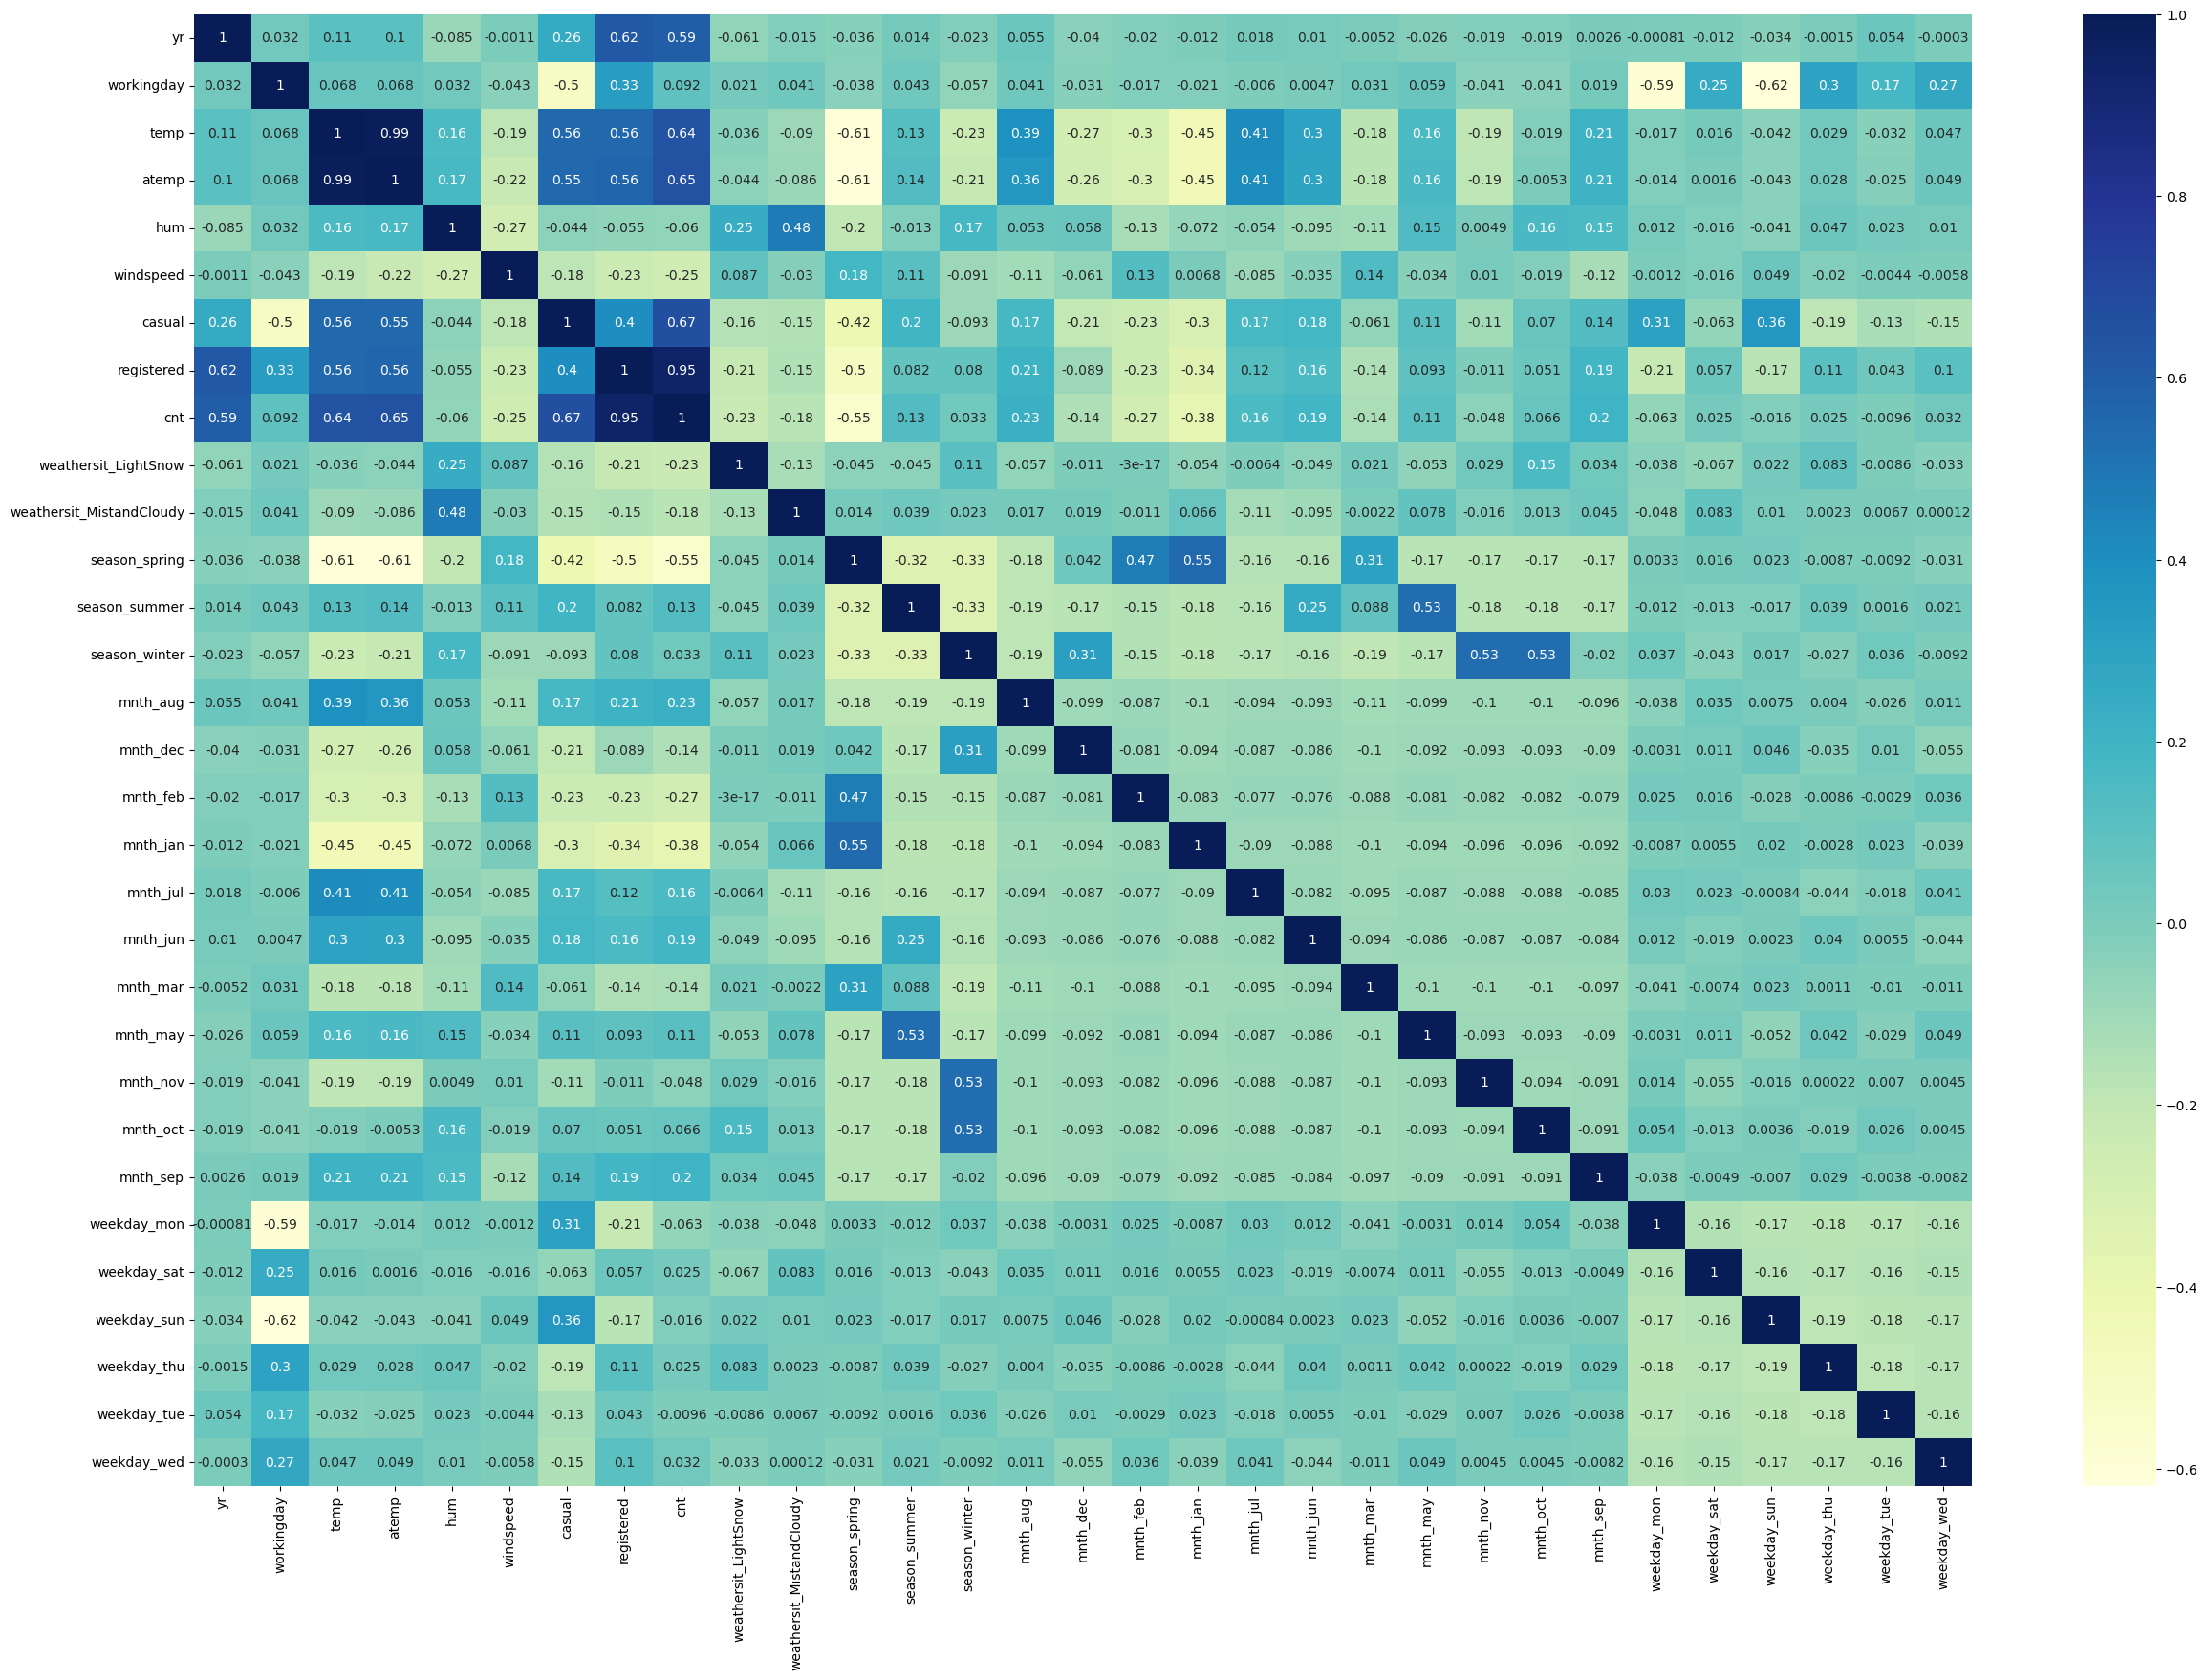

In [30]:
# Let's check the correlation coefficients now. 
plt.figure(figsize = (30, 20))
sns.heatmap(df_train.corr(), annot = True, cmap="YlGnBu")
plt.show()


Looking at the map, we can notice that Registered users is correlated to Count

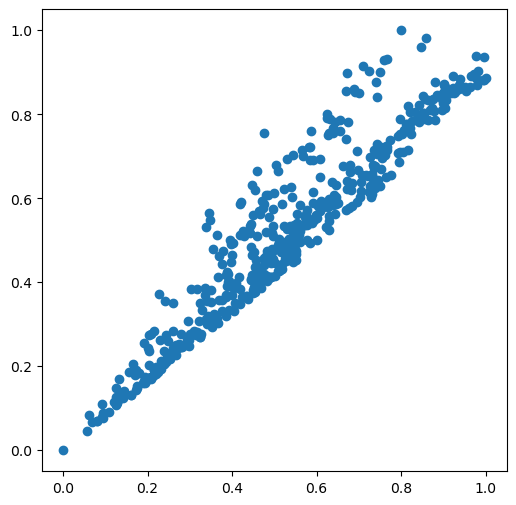

In [31]:
plt.figure(figsize=[6,6])
plt.scatter(df_train.registered, df_train.cnt)
plt.show()

In [32]:
# Lets divide the set into X and y 

In [33]:
y_train = df_train.pop('cnt')
X_train = df_train

## Building a simple linear model with one variable

### Lets fit a line through training data. Lets use statsmodel. We need to add a constant to the dataset. 

In [34]:
import statsmodels.api as sm

# Add a constant
X_train_lm = sm.add_constant(X_train[['registered']])

# Create a first fitted model
lr = sm.OLS(y_train, X_train_lm).fit()

In [35]:
lr.params

const         0.024532
registered    0.933473
dtype: float64

In [36]:
# Lets print the summary
print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.899
Model:                            OLS   Adj. R-squared:                  0.899
Method:                 Least Squares   F-statistic:                     4541.
Date:                Tue, 14 Mar 2023   Prob (F-statistic):          1.75e-255
Time:                        21:59:18   Log-Likelihood:                 624.12
No. Observations:                 510   AIC:                            -1244.
Df Residuals:                     508   BIC:                            -1236.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0245      0.008      3.099      0.0

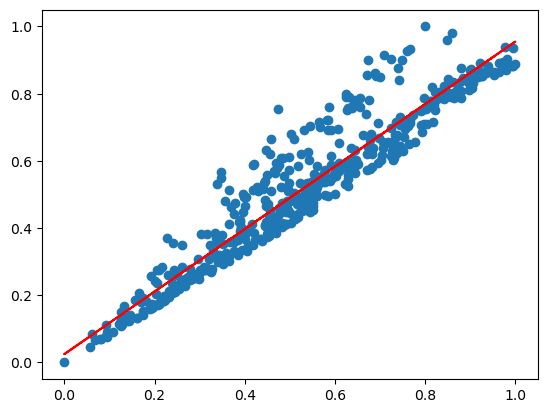

In [37]:
# Let's visualise the data with a scatter plot and the fitted regression line
plt.scatter(X_train_lm.iloc[:, 1], y_train)
plt.plot(X_train_lm.iloc[:, 1], 0.025 + 0.93*X_train_lm.iloc[:, 1], 'r')
plt.show()

## Multiple Linear regression
### Lets add another variable 'atemp' which has good correlation 

In [38]:
X_train_lm = X_train[['registered', 'atemp']]

In [39]:
# Add a constant
X_train_lm = sm.add_constant(X_train_lm)

# Create a first fitted model
lr = sm.OLS(y_train, X_train_lm).fit()

In [40]:
print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.918
Model:                            OLS   Adj. R-squared:                  0.918
Method:                 Least Squares   F-statistic:                     2854.
Date:                Tue, 14 Mar 2023   Prob (F-statistic):          1.18e-276
Time:                        22:00:51   Log-Likelihood:                 677.62
No. Observations:                 510   AIC:                            -1349.
Df Residuals:                     507   BIC:                            -1337.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0177      0.008     -2.174      0.0

###  Lets add one more variable 'yr'

In [41]:
X_train_lm = X_train[['registered', 'atemp','yr']]

In [42]:
# Add a constant
X_train_lm = sm.add_constant(X_train_lm)

# Create a fitted model
lr = sm.OLS(y_train, X_train_lm).fit()

In [43]:
print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.922
Model:                            OLS   Adj. R-squared:                  0.922
Method:                 Least Squares   F-statistic:                     1996.
Date:                Tue, 14 Mar 2023   Prob (F-statistic):          6.63e-280
Time:                        22:09:16   Log-Likelihood:                 689.29
No. Observations:                 510   AIC:                            -1371.
Df Residuals:                     506   BIC:                            -1354.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0175      0.008     -2.203      0.0

###  The adjusted R2 has increased and P value looks good too. Lets add all the variables and get rid of redundant variables

In [44]:
#Build a new linear model with all the variables

import statsmodels.api as sm
X_train_lm = sm.add_constant(X_train)

lr_all = sm.OLS(y_train, X_train_lm).fit()

lr_all.params

const                      -1.665335e-16
yr                          6.331741e-17
workingday                  1.165734e-15
temp                       -4.996004e-16
atemp                       5.551115e-16
hum                        -5.551115e-17
windspeed                  -3.608225e-16
casual                      3.774735e-01
registered                  7.968247e-01
weathersit_LightSnow       -3.608225e-16
weathersit_MistandCloudy    1.595946e-16
season_spring               1.179612e-16
season_summer               1.387779e-17
season_winter               3.469447e-16
mnth_aug                    2.810252e-16
mnth_dec                   -1.474515e-16
mnth_feb                   -2.949030e-16
mnth_jan                   -1.526557e-16
mnth_jul                   -7.979728e-17
mnth_jun                    2.914335e-16
mnth_mar                   -3.330669e-16
mnth_may                    3.365364e-16
mnth_nov                   -1.474515e-16
mnth_oct                   -1.387779e-17
mnth_sep        

In [45]:
print(lr_all.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 1.838e+30
Date:                Tue, 14 Mar 2023   Prob (F-statistic):               0.00
Time:                        22:25:05   Log-Likelihood:                 17102.
No. Observations:                 510   AIC:                        -3.414e+04
Df Residuals:                     479   BIC:                        -3.401e+04
Df Model:                          30                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                   

There are many variables with high P values which indidcates insignificance. Lets use VIF to check the correlation among other variables.

In [46]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [47]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features     VIF
2                       temp  450.39
3                      atemp  384.80
7                 registered   47.28
4                        hum   40.30
1                 workingday   28.55
12             season_winter   13.05
10             season_spring   12.47
6                     casual   11.30
11             season_summer    8.36
26               weekday_sun    7.25
22                  mnth_oct    6.56
13                  mnth_aug    6.54
24               weekday_mon    6.51
0                         yr    6.48
21                  mnth_nov    6.09
5                  windspeed    5.98
17                  mnth_jul    5.66
16                  mnth_jan    5.45
14                  mnth_dec    5.13
23                  mnth_sep    4.76
15                  mnth_feb    4.12
19                  mnth_mar    3.52
18                  mnth_jun    3.10
9   weathersit_MistandCloudy    2.60
20                  mnth_may    2.48
27               weekday_thu    2.21
28               weekday_tue    2.12
25               weekday_sat    2.01
29               weekday_wed    2.01
8       weathersit_LightSnow    1.62

VIF is too high for these fields. We need to drop the variables with high VIF. 

Looking at these tables, P value and VIF of mnth_oct are high, lets drop this variable and check the results again.

In [48]:
X = X_train.drop('mnth_oct', 1)

/var/folders/gg/7k4yc41x7613l28wqf24kd0m0000gn/T/ipykernel_38949/1050885479.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  X = X_train.drop('mnth_oct', 1)


In [49]:
X_train_lm = sm.add_constant(X)

lr_all_2 = sm.OLS(y_train, X_train_lm).fit()

lr_all_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 7.745e+29
Date:                Tue, 14 Mar 2023   Prob (F-statistic):               0.00
Time:                        22:31:22   Log-Likelihood:                 16872.
No. Observations:                 510   AIC:                        -3.368e+04
Df Residuals:                     480   BIC:                        -3.356e+04
Df Model:                          29                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                     3.331e-16   6.14e-16      0.543      0.588   -8.73e-16    1.54e-15
yr                       -1.292e-16   1.71e-16     -0.756      0.450   -4.65e-16    2.07e-16
workingday                5.967e-16   3.43e-16      1.737      0.083   -7.82e-17    1.27e-15
temp                     -2.776e-16   1.74e-15     -0.160      0.873   -3.69e-15    3.14e-15
atemp                    -2.776e-16   1.67e-15     -0.166      0.868   -3.57e-15    3.01e-15
hum                       3.608e-16    4.7e-16      0.768      0.443   -5.62e-16    1.28e-15
windspeed                -6.939e-17   3.35e-16     -0.207      0.836   -7.28e-16    5.89e-16
casual                       0.3775   4.86e-16   7.77e+14      0.000       0.377       0.377
registered                   0.7968   5.79e-16   1.38e+15      0.000       0.797       0.797
weathersit_LightSnow     -1.596e-16   3.51e-16     -0.454      0.650    -8.5e-16    5.31e-16
weathersit_MistandCloudy  1.735e-16   1.31e-16      1.328      0.185   -8.32e-17     4.3e-16
season_spring             -1.11e-16   3.64e-16     -0.305      0.761   -8.27e-16    6.05e-16
season_summer            -2.776e-17   2.89e-16     -0.096      0.924   -5.96e-16     5.4e-16
season_winter            -2.567e-16   3.03e-16     -0.847      0.397   -8.52e-16    3.39e-16
mnth_aug                  -2.03e-16   3.61e-16     -0.562      0.575   -9.13e-16    5.07e-16
mnth_dec                  3.331e-16   2.51e-16      1.329      0.185   -1.59e-16    8.26e-16
mnth_feb                  2.776e-16   3.44e-16      0.808      0.420   -3.98e-16    9.53e-16
mnth_jan                  3.469e-16   3.52e-16      0.987      0.324   -3.44e-16    1.04e-15
mnth_jul                  2.602e-18    3.8e-16      0.007      0.995   -7.43e-16    7.49e-16
mnth_jun                 -3.608e-16   2.87e-16     -1.255      0.210   -9.26e-16    2.04e-16
mnth_mar                  2.116e-16   2.54e-16      0.834      0.405   -2.87e-16     7.1e-16
mnth_may                 -7.286e-17   2.48e-16     -0.294      0.769   -5.59e-16    4.13e-16
mnth_nov                 -1.665e-16   2.36e-16     -0.705      0.481   -6.31e-16    2.97e-16
mnth_sep                 -5.551e-17   3.09e-16     -0.180      0.857   -6.62e-16    5.51e-16
weekday_mon              -9.714e-17   3.68e-16     -0.264      0.792    -8.2e-16    6.26e-16
weekday_sat              -6.592e-17    1.9e-16     -0.347      0.729   -4.39e-16    3.07e-16
weekday_sun               8.262e-17   3.69e-16      0.224      0.823   -6.43e-16    8.08e-16
weekday_thu               -1.11e-16   1.77e-16     -0.626      0.532    -4.6e-16    2.38e-16
weekday_tue               4.163e-17   1.83e-16      0.227      0.820   -3.18e-16    4.01e-16
weekday_wed               8.934e-17   1.86e-16      0.479      0.632   -2.77e-16    4.55e-16
==============

In [50]:
# Calculate the VIFs again for the new model
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features     VIF
2                       temp  449.81
3                      atemp  384.69
7                 registered   47.27
4                        hum   38.05
1                 workingday   28.11
10             season_spring   12.28
6                     casual   11.20
12             season_winter    8.98
11             season_summer    7.46
25               weekday_sun    7.17
0                         yr    6.46
23               weekday_mon    6.43
5                  windspeed    5.90
13                  mnth_aug    5.37
17                  mnth_jul    4.75
16                  mnth_jan    4.41
15                  mnth_feb    3.30
22                  mnth_sep    3.24
18                  mnth_jun    2.75
19                  mnth_mar    2.74
9   weathersit_MistandCloudy    2.59
20                  mnth_may    2.28
26               weekday_thu    2.21
14                  mnth_dec    2.14
27               weekday_tue    2.12
24               weekday_sat    2.01
28               weekday_wed    2.01
21                  mnth_nov    1.91
8       weathersit_LightSnow    1.62

In [51]:
X = X.drop('temp', 1)
X_train_lm = sm.add_constant(X)

lr_all_3 = sm.OLS(y_train, X_train_lm).fit()

lr_all_3.summary()

/var/folders/gg/7k4yc41x7613l28wqf24kd0m0000gn/T/ipykernel_38949/3804418789.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  X = X.drop('temp', 1)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 1.703e+30
Date:                Tue, 14 Mar 2023   Prob (F-statistic):               0.00
Time:                        22:33:55   Log-Likelihood:                 17064.
No. Observations:                 510   AIC:                        -3.407e+04
Df Residuals:                     481   BIC:                        -3.395e+04
Df Model:                          28                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                    -5.551e-16   4.17e-16     -1.330      0.184   -1.38e-15    2.65e-16
yr                       -5.438e-16   1.17e-16     -4.634      0.000   -7.74e-16   -3.13e-16
workingday                2.637e-16   2.35e-16      1.121      0.263   -1.98e-16    7.26e-16
atemp                     -7.91e-16   4.06e-16     -1.947      0.052   -1.59e-15    7.12e-18
hum                       2.776e-17   3.21e-16      0.086      0.931   -6.04e-16    6.59e-16
windspeed                 3.053e-16   2.23e-16      1.370      0.171   -1.33e-16    7.43e-16
casual                       0.3775   3.31e-16   1.14e+15      0.000       0.377       0.377
registered                   0.7968   3.97e-16   2.01e+15      0.000       0.797       0.797
weathersit_LightSnow      3.296e-16   2.41e-16      1.370      0.171   -1.43e-16    8.02e-16
weathersit_MistandCloudy -1.735e-16   8.96e-17     -1.935      0.054    -3.5e-16    2.66e-18
season_spring            -1.041e-16   2.49e-16     -0.418      0.676   -5.94e-16    3.86e-16
season_summer            -4.163e-17   1.97e-16     -0.211      0.833   -4.28e-16    3.45e-16
season_winter            -6.939e-17   2.07e-16     -0.335      0.738   -4.76e-16    3.38e-16
mnth_aug                  -1.96e-16    2.4e-16     -0.816      0.415   -6.68e-16    2.76e-16
mnth_dec                 -3.192e-16   1.71e-16     -1.868      0.062   -6.55e-16    1.65e-17
mnth_feb                  6.939e-17   2.35e-16      0.295      0.768   -3.92e-16    5.31e-16
mnth_jan                  2.776e-17    2.4e-16      0.116      0.908   -4.43e-16    4.99e-16
mnth_jul                 -1.388e-17   2.54e-16     -0.055      0.956   -5.12e-16    4.85e-16
mnth_jun                 -4.163e-17   1.88e-16     -0.221      0.825   -4.12e-16    3.28e-16
mnth_mar                 -6.939e-17   1.74e-16     -0.399      0.690   -4.11e-16    2.73e-16
mnth_may                  3.192e-16   1.67e-16      1.916      0.056   -8.23e-18    6.47e-16
mnth_nov                  -1.11e-16   1.61e-16     -0.688      0.492   -4.28e-16    2.06e-16
mnth_sep                 -1.388e-16    2.1e-16     -0.660      0.509   -5.52e-16    2.74e-16
weekday_mon              -1.041e-16   2.51e-16     -0.414      0.679   -5.98e-16     3.9e-16
weekday_sat              -4.163e-17    1.3e-16     -0.320      0.749   -2.97e-16    2.14e-16
weekday_sun              -8.934e-17   2.52e-16     -0.354      0.723   -5.85e-16    4.06e-16
weekday_thu               9.714e-17   1.22e-16      0.798      0.425   -1.42e-16    3.36e-16
weekday_tue               1.874e-16   1.26e-16      1.492      0.136   -5.93e-17    4.34e-16
weekday_wed              -8.945e-17   1.28e-16     -0.700      0.484   -3.41e-16    1.62e-16
==============================================================================
Omnibus:                    

In [52]:
# Calculate the VIFs again for the new model
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features    VIF
6                 registered  47.05
2                      atemp  44.36
3                        hum  37.33
1                 workingday  28.10
9              season_spring  12.28
5                     casual  10.97
11             season_winter   8.96
10             season_summer   7.42
24               weekday_sun   7.15
0                         yr   6.45
22               weekday_mon   6.42
4                  windspeed   5.34
12                  mnth_aug   4.93
16                  mnth_jul   4.43
15                  mnth_jan   4.38
14                  mnth_feb   3.29
21                  mnth_sep   3.15
18                  mnth_mar   2.74
8   weathersit_MistandCloudy   2.59
17                  mnth_jun   2.49
19                  mnth_may   2.20
25               weekday_thu   2.20
13                  mnth_dec   2.13
26               weekday_tue   2.12
27               weekday_wed   2.01
23               weekday_sat   1.99
20                  mnth_nov   1.90
7       weathersit_LightSnow   1.61

In [53]:
X = X.drop('mnth_jul', 1)
X_train_lm = sm.add_constant(X)

lr_all_3 = sm.OLS(y_train, X_train_lm).fit()

lr_all_3.summary()

/var/folders/gg/7k4yc41x7613l28wqf24kd0m0000gn/T/ipykernel_38949/4239980320.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  X = X.drop('mnth_jul', 1)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 6.804e+30
Date:                Tue, 14 Mar 2023   Prob (F-statistic):               0.00
Time:                        22:40:59   Log-Likelihood:                 17407.
No. Observations:                 510   AIC:                        -3.476e+04
Df Residuals:                     482   BIC:                        -3.464e+04
Df Model:                          27                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                     -2.22e-16   2.07e-16     -1.071      0.285    -6.3e-16    1.85e-16
yr                       -3.574e-16   5.98e-17     -5.977      0.000   -4.75e-16    -2.4e-16
workingday                3.747e-16    1.2e-16      3.129      0.002    1.39e-16     6.1e-16
atemp                    -1.804e-16   1.93e-16     -0.933      0.351    -5.6e-16    1.99e-16
hum                       2.776e-17   1.63e-16      0.170      0.865   -2.93e-16    3.48e-16
windspeed                -8.327e-17   1.13e-16     -0.735      0.463   -3.06e-16    1.39e-16
casual                       0.3775   1.68e-16   2.25e+15      0.000       0.377       0.377
registered                   0.7968   2.02e-16   3.94e+15      0.000       0.797       0.797
weathersit_LightSnow      2.776e-17   1.23e-16      0.226      0.821   -2.13e-16    2.69e-16
weathersit_MistandCloudy   1.18e-16   4.57e-17      2.583      0.010    2.82e-17    2.08e-16
season_spring            -8.327e-17    1.1e-16     -0.756      0.450      -3e-16    1.33e-16
season_summer            -2.359e-16    7.9e-17     -2.986      0.003   -3.91e-16   -8.07e-17
season_winter             2.776e-17   8.12e-17      0.342      0.733   -1.32e-16    1.87e-16
mnth_aug                  5.117e-17   7.59e-17      0.675      0.500   -9.79e-17       2e-16
mnth_dec                 -2.151e-16    8.7e-17     -2.472      0.014   -3.86e-16   -4.41e-17
mnth_feb                 -2.637e-16    1.2e-16     -2.202      0.028   -4.99e-16   -2.84e-17
mnth_jan                 -6.939e-17   1.22e-16     -0.568      0.570   -3.09e-16     1.7e-16
mnth_jun                  4.857e-16   7.76e-17      6.263      0.000    3.33e-16    6.38e-16
mnth_mar                  -4.51e-17   8.82e-17     -0.511      0.610   -2.19e-16    1.28e-16
mnth_may                  7.633e-17   8.13e-17      0.939      0.348   -8.34e-17    2.36e-16
mnth_nov                  8.327e-17   8.22e-17      1.013      0.312   -7.82e-17    2.45e-16
mnth_sep                          0   7.73e-17          0      1.000   -1.52e-16    1.52e-16
weekday_mon              -2.012e-16   1.28e-16     -1.577      0.115   -4.52e-16    4.95e-17
weekday_sat              -2.012e-16   6.62e-17     -3.041      0.002   -3.31e-16   -7.12e-17
weekday_sun               1.847e-16   1.28e-16      1.445      0.149   -6.64e-17    4.36e-16
weekday_thu               -1.18e-16    6.2e-17     -1.902      0.058    -2.4e-16    3.89e-18
weekday_tue              -1.527e-16   6.39e-17     -2.388      0.017   -2.78e-16    -2.7e-17
weekday_wed              -2.299e-16   6.51e-17     -3.530      0.000   -3.58e-16   -1.02e-16
==============================================================================
Omnibus:                        5.350   Durbin-Watson:                   1.493
Prob(Omnibus):                  0.069   Ja

In [54]:
X = X.drop('mnth_sep', 1)
X_train_lm = sm.add_constant(X)

lr_all_3 = sm.OLS(y_train, X_train_lm).fit()

lr_all_3.summary()

/var/folders/gg/7k4yc41x7613l28wqf24kd0m0000gn/T/ipykernel_38949/1956904751.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  X = X.drop('mnth_sep', 1)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 3.574e+30
Date:                Tue, 14 Mar 2023   Prob (F-statistic):               0.00
Time:                        22:41:41   Log-Likelihood:                 17233.
No. Observations:                 510   AIC:                        -3.441e+04
Df Residuals:                     483   BIC:                        -3.430e+04
Df Model:                          26                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                     -1.11e-15   2.89e-16     -3.846      0.000   -1.68e-15   -5.43e-16
yr                       -4.476e-16   8.24e-17     -5.433      0.000   -6.09e-16   -2.86e-16
workingday                2.567e-16   1.67e-16      1.535      0.126    -7.2e-17    5.85e-16
atemp                      4.77e-16   2.66e-16      1.795      0.073   -4.51e-17    9.99e-16
hum                      -1.388e-16   2.26e-16     -0.613      0.540   -5.83e-16    3.06e-16
windspeed                 5.967e-16   1.59e-16      3.746      0.000    2.84e-16     9.1e-16
casual                       0.3775   2.36e-16    1.6e+15      0.000       0.377       0.377
registered                   0.7968   2.76e-16   2.89e+15      0.000       0.797       0.797
weathersit_LightSnow     -6.939e-18   1.72e-16     -0.040      0.968   -3.45e-16    3.31e-16
weathersit_MistandCloudy  1.527e-16    6.4e-17      2.384      0.018    2.68e-17    2.78e-16
season_spring            -3.088e-16   1.52e-16     -2.032      0.043   -6.07e-16   -1.02e-17
season_summer             1.804e-16   1.04e-16      1.739      0.083   -2.34e-17    3.84e-16
season_winter            -1.232e-16   1.07e-16     -1.154      0.249   -3.33e-16    8.66e-17
mnth_aug                 -3.331e-16   9.64e-17     -3.457      0.001   -5.22e-16   -1.44e-16
mnth_dec                  2.359e-16   1.21e-16      1.953      0.051   -1.39e-18    4.73e-16
mnth_feb                  2.637e-16   1.67e-16      1.574      0.116   -6.54e-17    5.93e-16
mnth_jan                 -2.776e-17   1.71e-16     -0.163      0.871   -3.63e-16    3.08e-16
mnth_jun                 -1.457e-16   1.07e-16     -1.356      0.176   -3.57e-16    6.54e-17
mnth_mar                   1.47e-16   1.23e-16      1.193      0.234   -9.52e-17    3.89e-16
mnth_may                 -3.469e-17   1.14e-16     -0.305      0.760   -2.58e-16    1.89e-16
mnth_nov                  3.678e-16   1.14e-16      3.220      0.001    1.43e-16    5.92e-16
weekday_mon              -1.735e-16   1.79e-16     -0.971      0.332   -5.25e-16    1.78e-16
weekday_sat                 1.7e-16   9.29e-17      1.829      0.068   -1.26e-17    3.53e-16
weekday_sun               5.031e-17   1.79e-16      0.281      0.779   -3.02e-16    4.02e-16
weekday_thu               1.388e-17   8.72e-17      0.159      0.874   -1.57e-16    1.85e-16
weekday_tue               2.845e-16   8.98e-17      3.167      0.002    1.08e-16    4.61e-16
weekday_wed              -8.327e-17   9.15e-17     -0.910      0.363   -2.63e-16    9.65e-17
==============================================================================
Omnibus:                       10.704   Durbin-Watson:                   1.252
Prob(Omnibus):                  0.005   Jarque-Bera (JB):               10.856
Skew:                           0.335   Prob(JB):       

In [55]:
X = X.drop('weathersit_LightSnow', 1)
X_train_lm = sm.add_constant(X)

lr_all_3 = sm.OLS(y_train, X_train_lm).fit()

lr_all_3.summary()

/var/folders/gg/7k4yc41x7613l28wqf24kd0m0000gn/T/ipykernel_38949/4221966257.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  X = X.drop('weathersit_LightSnow', 1)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 1.539e+30
Date:                Tue, 14 Mar 2023   Prob (F-statistic):               0.00
Time:                        22:42:31   Log-Likelihood:                 17008.
No. Observations:                 510   AIC:                        -3.396e+04
Df Residuals:                     484   BIC:                        -3.385e+04
Df Model:                          25                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                    -7.216e-16   4.49e-16     -1.609      0.108    -1.6e-15     1.6e-16
yr                       -4.476e-16   1.21e-16     -3.704      0.000   -6.85e-16    -2.1e-16
workingday               -2.082e-17   2.58e-16     -0.081      0.936   -5.29e-16    4.87e-16
atemp                     1.353e-16   4.13e-16      0.328      0.743   -6.76e-16    9.47e-16
hum                      -3.886e-16   3.34e-16     -1.164      0.245   -1.04e-15    2.67e-16
windspeed                 8.465e-16   2.47e-16      3.424      0.001    3.61e-16    1.33e-15
casual                       0.3775   3.66e-16   1.03e+15      0.000       0.377       0.377
registered                   0.7968   3.98e-16      2e+15      0.000       0.797       0.797
weathersit_MistandCloudy -9.021e-17   9.14e-17     -0.987      0.324    -2.7e-16    8.94e-17
season_spring            -4.337e-16   2.34e-16     -1.851      0.065   -8.94e-16    2.67e-17
season_summer             2.706e-16   1.61e-16      1.684      0.093   -4.51e-17    5.86e-16
season_winter              -1.7e-16   1.66e-16     -1.026      0.305   -4.95e-16    1.55e-16
mnth_aug                  2.498e-16    1.5e-16      1.669      0.096   -4.42e-17    5.44e-16
mnth_dec                  1.735e-16   1.86e-16      0.935      0.350   -1.91e-16    5.38e-16
mnth_feb                 -6.245e-17    2.6e-16     -0.240      0.810   -5.73e-16    4.48e-16
mnth_jan                 -6.939e-17   2.64e-16     -0.263      0.792   -5.87e-16    4.48e-16
mnth_jun                 -2.637e-16   1.67e-16     -1.579      0.115   -5.92e-16    6.44e-17
mnth_mar                  3.556e-17   1.92e-16      0.186      0.853   -3.41e-16    4.12e-16
mnth_may                 -1.249e-16   1.77e-16     -0.707      0.480   -4.72e-16    2.22e-16
mnth_nov                  2.914e-16   1.76e-16      1.656      0.098   -5.43e-17    6.37e-16
weekday_mon              -8.327e-17   2.78e-16     -0.300      0.764   -6.29e-16    4.62e-16
weekday_sat              -2.776e-17   1.44e-16     -0.192      0.847   -3.11e-16    2.56e-16
weekday_sun               -1.44e-16   2.78e-16     -0.518      0.605    -6.9e-16    4.02e-16
weekday_thu              -1.943e-16   1.35e-16     -1.434      0.152    -4.6e-16    7.18e-17
weekday_tue              -3.469e-17   1.39e-16     -0.249      0.803   -3.08e-16    2.39e-16
weekday_wed              -9.628e-17   1.42e-16     -0.679      0.498   -3.75e-16    1.82e-16
==============================================================================
Omnibus:                       15.597   Durbin-Watson:                   0.480
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               16.512
Skew:                           0.431   Prob(JB):                     0.000260
Kurtosis:                       2.819   Cond. No.                     

In [56]:
# Calculate the VIFs again for the new model
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features    VIF
6                 registered  37.23
2                      atemp  34.41
3                        hum  30.86
1                 workingday  26.82
5                     casual  10.87
8              season_spring   9.31
21               weekday_sun   6.71
19               weekday_mon   6.08
0                         yr   5.42
4                  windspeed   5.28
10             season_winter   4.94
9              season_summer   4.27
14                  mnth_jan   4.26
13                  mnth_feb   3.26
16                  mnth_mar   2.70
22               weekday_thu   2.19
7   weathersit_MistandCloudy   2.17
23               weekday_tue   2.09
12                  mnth_dec   2.04
24               weekday_wed   1.99
20               weekday_sat   1.97
17                  mnth_may   1.95
18                  mnth_nov   1.84
11                  mnth_aug   1.64
15                  mnth_jun   1.57

In [57]:
#registered
X = X.drop('registered', 1)
X_train_lm = sm.add_constant(X)

lr_all_3 = sm.OLS(y_train, X_train_lm).fit()

lr_all_3.summary()

/var/folders/gg/7k4yc41x7613l28wqf24kd0m0000gn/T/ipykernel_38949/2784803606.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  X = X.drop('registered', 1)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.896
Model:                            OLS   Adj. R-squared:                  0.891
Method:                 Least Squares   F-statistic:                     173.9
Date:                Tue, 14 Mar 2023   Prob (F-statistic):          9.52e-221
Time:                        22:44:34   Log-Likelihood:                 615.37
No. Observations:                 510   AIC:                            -1181.
Df Residuals:                     485   BIC:                            -1075.
Df Model:                          24                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                        0.2174      0.040      5.496      0.000       0.140       0.295
yr                           0.1814      0.007     24.993      0.000       0.167       0.196
workingday                   0.1430      0.023      6.336      0.000       0.099       0.187
atemp                        0.2006      0.036      5.508      0.000       0.129       0.272
hum                         -0.1612      0.029     -5.477      0.000      -0.219      -0.103
windspeed                   -0.1020      0.022     -4.638      0.000      -0.145      -0.059
casual                       0.6245      0.031     19.938      0.000       0.563       0.686
weathersit_MistandCloudy    -0.0143      0.008     -1.723      0.085      -0.031       0.002
season_spring               -0.0635      0.021     -3.011      0.003      -0.105      -0.022
season_summer               -0.0241      0.015     -1.658      0.098      -0.053       0.004
season_winter                0.0678      0.015      4.600      0.000       0.039       0.097
mnth_aug                     0.0137      0.014      1.005      0.315      -0.013       0.040
mnth_dec                     0.0120      0.017      0.712      0.477      -0.021       0.045
mnth_feb                     0.0061      0.024      0.258      0.796      -0.040       0.053
mnth_jan                    -0.0179      0.024     -0.750      0.454      -0.065       0.029
mnth_jun                     0.0217      0.015      1.433      0.152      -0.008       0.051
mnth_mar                    -0.0044      0.017     -0.251      0.802      -0.039       0.030
mnth_may                     0.0421      0.016      2.638      0.009       0.011       0.073
mnth_nov                    -0.0154      0.016     -0.963      0.336      -0.047       0.016
weekday_mon                 -0.0476      0.025     -1.892      0.059      -0.097       0.002
weekday_sat                 -0.0151      0.013     -1.150      0.251      -0.041       0.011
weekday_sun                 -0.0191      0.025     -0.757      0.450      -0.069       0.030
weekday_thu                  0.0104      0.012      0.844      0.399      -0.014       0.035
weekday_tue                 -0.0152      0.013     -1.199      0.231      -0.040       0.010
weekday_wed                  0.0014      0.013      0.107      0.915      -0.024       0.027
==============================================================================
Omnibus:                      170.215   Durbin-Watson:                   2.020
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              835.917
Skew:                          -1.393   Prob(JB):                    3.04e-182
Kurtosis:                       8.619   Cond. No.                         29.5
==============================================================================

Note

In [59]:
#weekday_wed
X = X.drop('weekday_wed', 1)
X_train_lm = sm.add_constant(X)

lr_all_3 = sm.OLS(y_train, X_train_lm).fit()

lr_all_3.summary()

/var/folders/gg/7k4yc41x7613l28wqf24kd0m0000gn/T/ipykernel_38949/334383188.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  X = X.drop('weekday_wed', 1)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.896
Model:                            OLS   Adj. R-squared:                  0.891
Method:                 Least Squares   F-statistic:                     181.8
Date:                Tue, 14 Mar 2023   Prob (F-statistic):          7.02e-222
Time:                        22:45:47   Log-Likelihood:                 615.36
No. Observations:                 510   AIC:                            -1183.
Df Residuals:                     486   BIC:                            -1081.
Df Model:                          23                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                        0.2179      0.039      5.560      0.000       0.141       0.295
yr                           0.1815      0.007     25.020      0.000       0.167       0.196
workingday                   0.1431      0.023      6.353      0.000       0.099       0.187
atemp                        0.2007      0.036      5.518      0.000       0.129       0.272
hum                         -0.1612      0.029     -5.483      0.000      -0.219      -0.103
windspeed                   -0.1020      0.022     -4.643      0.000      -0.145      -0.059
casual                       0.6244      0.031     19.962      0.000       0.563       0.686
weathersit_MistandCloudy    -0.0143      0.008     -1.723      0.086      -0.031       0.002
season_spring               -0.0635      0.021     -3.013      0.003      -0.105      -0.022
season_summer               -0.0241      0.015     -1.657      0.098      -0.053       0.004
season_winter                0.0678      0.015      4.613      0.000       0.039       0.097
mnth_aug                     0.0136      0.014      1.006      0.315      -0.013       0.040
mnth_dec                     0.0119      0.017      0.707      0.480      -0.021       0.045
mnth_feb                     0.0062      0.024      0.261      0.794      -0.040       0.053
mnth_jan                    -0.0180      0.024     -0.752      0.452      -0.065       0.029
mnth_jun                     0.0216      0.015      1.432      0.153      -0.008       0.051
mnth_mar                    -0.0044      0.017     -0.255      0.799      -0.039       0.030
mnth_may                     0.0421      0.016      2.641      0.009       0.011       0.073
mnth_nov                    -0.0155      0.016     -0.969      0.333      -0.047       0.016
weekday_mon                 -0.0481      0.025     -1.960      0.051      -0.096       0.000
weekday_sat                 -0.0157      0.011     -1.378      0.169      -0.038       0.007
weekday_sun                 -0.0197      0.025     -0.797      0.426      -0.068       0.029
weekday_thu                  0.0097      0.010      0.925      0.355      -0.011       0.030
weekday_tue                 -0.0158      0.011     -1.444      0.150      -0.037       0.006
==============================================================================
Omnibus:                      170.384   Durbin-Watson:                   2.019
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              836.814
Skew:                          -1.394   Prob(JB):                    1.94e-182
Kurtosis:                       8.622   Cond. No.                         29.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified

In [60]:
#mnth_mar
X = X.drop('mnth_mar', 1)
X_train_lm = sm.add_constant(X)

lr_all_3 = sm.OLS(y_train, X_train_lm).fit()

lr_all_3.summary()

/var/folders/gg/7k4yc41x7613l28wqf24kd0m0000gn/T/ipykernel_38949/310781642.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  X = X.drop('mnth_mar', 1)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.896
Model:                            OLS   Adj. R-squared:                  0.891
Method:                 Least Squares   F-statistic:                     190.4
Date:                Tue, 14 Mar 2023   Prob (F-statistic):          5.19e-223
Time:                        22:46:34   Log-Likelihood:                 615.33
No. Observations:                 510   AIC:                            -1185.
Df Residuals:                     487   BIC:                            -1087.
Df Model:                          22                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                        0.2166      0.039      5.580      0.000       0.140       0.293
yr                           0.1814      0.007     25.046      0.000       0.167       0.196
workingday                   0.1428      0.022      6.354      0.000       0.099       0.187
atemp                        0.2024      0.036      5.677      0.000       0.132       0.273
hum                         -0.1613      0.029     -5.489      0.000      -0.219      -0.104
windspeed                   -0.1016      0.022     -4.641      0.000      -0.145      -0.059
casual                       0.6246      0.031     19.996      0.000       0.563       0.686
weathersit_MistandCloudy    -0.0143      0.008     -1.725      0.085      -0.030       0.002
season_spring               -0.0664      0.018     -3.754      0.000      -0.101      -0.032
season_summer               -0.0248      0.014     -1.735      0.083      -0.053       0.003
season_winter                0.0678      0.015      4.616      0.000       0.039       0.097
mnth_aug                     0.0138      0.014      1.016      0.310      -0.013       0.040
mnth_dec                     0.0137      0.015      0.894      0.372      -0.016       0.044
mnth_feb                     0.0100      0.018      0.550      0.582      -0.026       0.046
mnth_jan                    -0.0140      0.018     -0.776      0.438      -0.049       0.021
mnth_jun                     0.0222      0.015      1.483      0.139      -0.007       0.052
mnth_may                     0.0431      0.015      2.791      0.005       0.013       0.073
mnth_nov                    -0.0147      0.016     -0.939      0.348      -0.045       0.016
weekday_mon                 -0.0483      0.025     -1.970      0.049      -0.097      -0.000
weekday_sat                 -0.0157      0.011     -1.373      0.171      -0.038       0.007
weekday_sun                 -0.0200      0.025     -0.810      0.418      -0.068       0.028
weekday_thu                  0.0098      0.010      0.934      0.351      -0.011       0.030
weekday_tue                 -0.0158      0.011     -1.444      0.149      -0.037       0.006
==============================================================================
Omnibus:                      169.701   Durbin-Watson:                   2.019
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              830.312
Skew:                          -1.389   Prob(JB):                    5.01e-181
Kurtosis:                       8.599   Cond. No.                         28.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [61]:
#mnth_feb
X = X.drop('mnth_feb', 1)
X_train_lm = sm.add_constant(X)

lr_all_3 = sm.OLS(y_train, X_train_lm).fit()

lr_all_3.summary()

/var/folders/gg/7k4yc41x7613l28wqf24kd0m0000gn/T/ipykernel_38949/3406270.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  X = X.drop('mnth_feb', 1)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.896
Model:                            OLS   Adj. R-squared:                  0.891
Method:                 Least Squares   F-statistic:                     199.8
Date:                Tue, 14 Mar 2023   Prob (F-statistic):          4.22e-224
Time:                        22:47:24   Log-Likelihood:                 615.17
No. Observations:                 510   AIC:                            -1186.
Df Residuals:                     488   BIC:                            -1093.
Df Model:                          21                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                        0.2212      0.038      5.837      0.000       0.147       0.296
yr                           0.1817      0.007     25.196      0.000       0.168       0.196
workingday                   0.1418      0.022      6.335      0.000       0.098       0.186
atemp                        0.1988      0.035      5.678      0.000       0.130       0.268
hum                         -0.1615      0.029     -5.501      0.000      -0.219      -0.104
windspeed                   -0.1025      0.022     -4.699      0.000      -0.145      -0.060
casual                       0.6221      0.031     20.153      0.000       0.561       0.683
weathersit_MistandCloudy    -0.0143      0.008     -1.736      0.083      -0.031       0.002
season_spring               -0.0636      0.017     -3.758      0.000      -0.097      -0.030
season_summer               -0.0257      0.014     -1.811      0.071      -0.054       0.002
season_winter                0.0676      0.015      4.605      0.000       0.039       0.096
mnth_aug                     0.0139      0.014      1.026      0.306      -0.013       0.040
mnth_dec                     0.0110      0.014      0.757      0.449      -0.017       0.039
mnth_jan                    -0.0194      0.015     -1.293      0.197      -0.049       0.010
mnth_jun                     0.0229      0.015      1.536      0.125      -0.006       0.052
mnth_may                     0.0437      0.015      2.839      0.005       0.013       0.074
mnth_nov                    -0.0161      0.015     -1.046      0.296      -0.046       0.014
weekday_mon                 -0.0486      0.025     -1.984      0.048      -0.097      -0.000
weekday_sat                 -0.0155      0.011     -1.363      0.174      -0.038       0.007
weekday_sun                 -0.0204      0.025     -0.830      0.407      -0.069       0.028
weekday_thu                  0.0097      0.010      0.927      0.354      -0.011       0.030
weekday_tue                 -0.0158      0.011     -1.446      0.149      -0.037       0.006
==============================================================================
Omnibus:                      171.910   Durbin-Watson:                   2.020
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              851.255
Skew:                          -1.406   Prob(JB):                    1.42e-185
Kurtosis:                       8.671   Cond. No.                         28.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [62]:
X = X.drop('mnth_dec', 1)
X_train_lm = sm.add_constant(X)

lr_all_3 = sm.OLS(y_train, X_train_lm).fit()

lr_all_3.summary()

/var/folders/gg/7k4yc41x7613l28wqf24kd0m0000gn/T/ipykernel_38949/1672006997.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  X = X.drop('mnth_dec', 1)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.896
Model:                            OLS   Adj. R-squared:                  0.891
Method:                 Least Squares   F-statistic:                     209.9
Date:                Tue, 14 Mar 2023   Prob (F-statistic):          3.82e-225
Time:                        22:47:52   Log-Likelihood:                 614.87
No. Observations:                 510   AIC:                            -1188.
Df Residuals:                     489   BIC:                            -1099.
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                        0.2273      0.037      6.142      0.000       0.155       0.300
yr                           0.1822      0.007     25.356      0.000       0.168       0.196
workingday                   0.1410      0.022      6.309      0.000       0.097       0.185
atemp                        0.1934      0.034      5.643      0.000       0.126       0.261
hum                         -0.1612      0.029     -5.494      0.000      -0.219      -0.104
windspeed                   -0.1046      0.022     -4.837      0.000      -0.147      -0.062
casual                       0.6178      0.030     20.373      0.000       0.558       0.677
weathersit_MistandCloudy    -0.0146      0.008     -1.777      0.076      -0.031       0.002
season_spring               -0.0646      0.017     -3.831      0.000      -0.098      -0.031
season_summer               -0.0269      0.014     -1.912      0.056      -0.055       0.001
season_winter                0.0696      0.014      4.829      0.000       0.041       0.098
mnth_aug                     0.0140      0.014      1.038      0.300      -0.013       0.041
mnth_jan                    -0.0223      0.015     -1.540      0.124      -0.051       0.006
mnth_jun                     0.0239      0.015      1.610      0.108      -0.005       0.053
mnth_may                     0.0445      0.015      2.901      0.004       0.014       0.075
mnth_nov                    -0.0207      0.014     -1.453      0.147      -0.049       0.007
weekday_mon                 -0.0485      0.024     -1.982      0.048      -0.097      -0.000
weekday_sat                 -0.0153      0.011     -1.343      0.180      -0.038       0.007
weekday_sun                 -0.0199      0.025     -0.808      0.420      -0.068       0.028
weekday_thu                  0.0095      0.010      0.909      0.364      -0.011       0.030
weekday_tue                 -0.0159      0.011     -1.452      0.147      -0.037       0.006
==============================================================================
Omnibus:                      175.211   Durbin-Watson:                   2.024
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              890.978
Skew:                          -1.427   Prob(JB):                    3.36e-194
Kurtosis:                       8.813   Cond. No.                         27.6
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [63]:
X = X.drop('weekday_sun', 1)
X_train_lm = sm.add_constant(X)

lr_all_3 = sm.OLS(y_train, X_train_lm).fit()

lr_all_3.summary()

/var/folders/gg/7k4yc41x7613l28wqf24kd0m0000gn/T/ipykernel_38949/2477957819.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  X = X.drop('weekday_sun', 1)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.896
Model:                            OLS   Adj. R-squared:                  0.891
Method:                 Least Squares   F-statistic:                     221.1
Date:                Tue, 14 Mar 2023   Prob (F-statistic):          3.51e-226
Time:                        22:48:29   Log-Likelihood:                 614.53
No. Observations:                 510   AIC:                            -1189.
Df Residuals:                     490   BIC:                            -1104.
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                        0.2109      0.031      6.817      0.000       0.150       0.272
yr                           0.1825      0.007     25.440      0.000       0.168       0.197
workingday                   0.1561      0.012     12.817      0.000       0.132       0.180
atemp                        0.1964      0.034      5.763      0.000       0.129       0.263
hum                         -0.1619      0.029     -5.523      0.000      -0.220      -0.104
windspeed                   -0.1055      0.022     -4.889      0.000      -0.148      -0.063
casual                       0.6132      0.030     20.586      0.000       0.555       0.672
weathersit_MistandCloudy    -0.0150      0.008     -1.827      0.068      -0.031       0.001
season_spring               -0.0643      0.017     -3.816      0.000      -0.097      -0.031
season_summer               -0.0266      0.014     -1.894      0.059      -0.054       0.001
season_winter                0.0694      0.014      4.817      0.000       0.041       0.098
mnth_aug                     0.0136      0.014      1.005      0.315      -0.013       0.040
mnth_jan                    -0.0224      0.015     -1.545      0.123      -0.051       0.006
mnth_jun                     0.0231      0.015      1.564      0.118      -0.006       0.052
mnth_may                     0.0444      0.015      2.894      0.004       0.014       0.074
mnth_nov                    -0.0192      0.014     -1.361      0.174      -0.047       0.009
weekday_mon                 -0.0312      0.012     -2.662      0.008      -0.054      -0.008
weekday_sat                 -0.0136      0.011     -1.214      0.225      -0.036       0.008
weekday_thu                  0.0106      0.010      1.027      0.305      -0.010       0.031
weekday_tue                 -0.0126      0.010     -1.242      0.215      -0.033       0.007
==============================================================================
Omnibus:                      171.032   Durbin-Watson:                   2.035
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              858.326
Skew:                          -1.393   Prob(JB):                    4.14e-187
Kurtosis:                       8.713   Cond. No.                         23.5
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [64]:
#mnth_aug
X = X.drop('mnth_aug', 1)
X_train_lm = sm.add_constant(X)

lr_all_3 = sm.OLS(y_train, X_train_lm).fit()

lr_all_3.summary()

/var/folders/gg/7k4yc41x7613l28wqf24kd0m0000gn/T/ipykernel_38949/2879709626.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  X = X.drop('mnth_aug', 1)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.895
Model:                            OLS   Adj. R-squared:                  0.891
Method:                 Least Squares   F-statistic:                     233.3
Date:                Tue, 14 Mar 2023   Prob (F-statistic):          3.74e-227
Time:                        22:49:04   Log-Likelihood:                 614.00
No. Observations:                 510   AIC:                            -1190.
Df Residuals:                     491   BIC:                            -1110.
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                        0.2150      0.031      7.009      0.000       0.155       0.275
yr                           0.1826      0.007     25.467      0.000       0.169       0.197
workingday                   0.1562      0.012     12.826      0.000       0.132       0.180
atemp                        0.1974      0.034      5.796      0.000       0.130       0.264
hum                         -0.1619      0.029     -5.524      0.000      -0.220      -0.104
windspeed                   -0.1057      0.022     -4.898      0.000      -0.148      -0.063
casual                       0.6138      0.030     20.609      0.000       0.555       0.672
weathersit_MistandCloudy    -0.0146      0.008     -1.777      0.076      -0.031       0.002
season_spring               -0.0689      0.016     -4.251      0.000      -0.101      -0.037
season_summer               -0.0309      0.013     -2.301      0.022      -0.057      -0.005
season_winter                0.0645      0.014      4.755      0.000       0.038       0.091
mnth_jan                    -0.0223      0.015     -1.539      0.124      -0.051       0.006
mnth_jun                     0.0207      0.015      1.416      0.157      -0.008       0.049
mnth_may                     0.0434      0.015      2.839      0.005       0.013       0.074
mnth_nov                    -0.0190      0.014     -1.350      0.178      -0.047       0.009
weekday_mon                 -0.0314      0.012     -2.683      0.008      -0.054      -0.008
weekday_sat                 -0.0135      0.011     -1.210      0.227      -0.036       0.008
weekday_thu                  0.0107      0.010      1.035      0.301      -0.010       0.031
weekday_tue                 -0.0128      0.010     -1.255      0.210      -0.033       0.007
==============================================================================
Omnibus:                      173.215   Durbin-Watson:                   2.048
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              856.451
Skew:                          -1.418   Prob(JB):                    1.06e-186
Kurtosis:                       8.680   Cond. No.                         23.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [66]:
X = X.drop('weekday_thu', 1)
X_train_lm = sm.add_constant(X)

lr_all_3 = sm.OLS(y_train, X_train_lm).fit()

lr_all_3.summary()

/var/folders/gg/7k4yc41x7613l28wqf24kd0m0000gn/T/ipykernel_38949/548491127.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  X = X.drop('weekday_thu', 1)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.895
Model:                            OLS   Adj. R-squared:                  0.891
Method:                 Least Squares   F-statistic:                     246.9
Date:                Tue, 14 Mar 2023   Prob (F-statistic):          3.99e-228
Time:                        22:50:40   Log-Likelihood:                 613.45
No. Observations:                 510   AIC:                            -1191.
Df Residuals:                     492   BIC:                            -1115.
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                        0.2149      0.031      7.007      0.000       0.155       0.275
yr                           0.1828      0.007     25.492      0.000       0.169       0.197
workingday                   0.1594      0.012     13.500      0.000       0.136       0.183
atemp                        0.1977      0.034      5.805      0.000       0.131       0.265
hum                         -0.1608      0.029     -5.487      0.000      -0.218      -0.103
windspeed                   -0.1060      0.022     -4.911      0.000      -0.148      -0.064
casual                       0.6125      0.030     20.582      0.000       0.554       0.671
weathersit_MistandCloudy    -0.0147      0.008     -1.792      0.074      -0.031       0.001
season_spring               -0.0688      0.016     -4.242      0.000      -0.101      -0.037
season_summer               -0.0306      0.013     -2.284      0.023      -0.057      -0.004
season_winter                0.0646      0.014      4.756      0.000       0.038       0.091
mnth_jan                    -0.0222      0.015     -1.533      0.126      -0.051       0.006
mnth_jun                     0.0213      0.015      1.461      0.145      -0.007       0.050
mnth_may                     0.0436      0.015      2.847      0.005       0.013       0.074
mnth_nov                    -0.0189      0.014     -1.342      0.180      -0.047       0.009
weekday_mon                 -0.0319      0.012     -2.725      0.007      -0.055      -0.009
weekday_sat                 -0.0173      0.011     -1.633      0.103      -0.038       0.004
weekday_tue                 -0.0162      0.010     -1.691      0.091      -0.035       0.003
==============================================================================
Omnibus:                      172.963   Durbin-Watson:                   2.044
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              869.118
Skew:                          -1.410   Prob(JB):                    1.88e-189
Kurtosis:                       8.740   Cond. No.                         23.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [67]:
#mnth_nov
X = X.drop('mnth_nov', 1)
X_train_lm = sm.add_constant(X)

lr_all_3 = sm.OLS(y_train, X_train_lm).fit()

lr_all_3.summary()

/var/folders/gg/7k4yc41x7613l28wqf24kd0m0000gn/T/ipykernel_38949/1922541260.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  X = X.drop('mnth_nov', 1)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.895
Model:                            OLS   Adj. R-squared:                  0.891
Method:                 Least Squares   F-statistic:                     261.8
Date:                Tue, 14 Mar 2023   Prob (F-statistic):          5.95e-229
Time:                        22:51:39   Log-Likelihood:                 612.52
No. Observations:                 510   AIC:                            -1191.
Df Residuals:                     493   BIC:                            -1119.
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                        0.2082      0.030      6.874      0.000       0.149       0.268
yr                           0.1825      0.007     25.442      0.000       0.168       0.197
workingday                   0.1601      0.012     13.567      0.000       0.137       0.183
atemp                        0.2023      0.034      5.966      0.000       0.136       0.269
hum                         -0.1579      0.029     -5.399      0.000      -0.215      -0.100
windspeed                   -0.1066      0.022     -4.936      0.000      -0.149      -0.064
casual                       0.6153      0.030     20.714      0.000       0.557       0.674
weathersit_MistandCloudy    -0.0147      0.008     -1.784      0.075      -0.031       0.001
season_spring               -0.0660      0.016     -4.098      0.000      -0.098      -0.034
season_summer               -0.0291      0.013     -2.176      0.030      -0.055      -0.003
season_winter                0.0597      0.013      4.560      0.000       0.034       0.085
mnth_jan                    -0.0216      0.015     -1.488      0.137      -0.050       0.007
mnth_jun                     0.0205      0.015      1.405      0.161      -0.008       0.049
mnth_may                     0.0424      0.015      2.773      0.006       0.012       0.072
weekday_mon                 -0.0316      0.012     -2.701      0.007      -0.055      -0.009
weekday_sat                 -0.0168      0.011     -1.584      0.114      -0.038       0.004
weekday_tue                 -0.0159      0.010     -1.657      0.098      -0.035       0.003
==============================================================================
Omnibus:                      168.088   Durbin-Watson:                   2.060
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              807.137
Skew:                          -1.381   Prob(JB):                    5.40e-176
Kurtosis:                       8.509   Cond. No.                         23.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [68]:
#mnth_jun
X = X.drop('mnth_jun', 1)
X_train_lm = sm.add_constant(X)

lr_all_3 = sm.OLS(y_train, X_train_lm).fit()

lr_all_3.summary()



/var/folders/gg/7k4yc41x7613l28wqf24kd0m0000gn/T/ipykernel_38949/845079658.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  X = X.drop('mnth_jun', 1)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.894
Model:                            OLS   Adj. R-squared:                  0.891
Method:                 Least Squares   F-statistic:                     278.6
Date:                Tue, 14 Mar 2023   Prob (F-statistic):          9.35e-230
Time:                        22:52:14   Log-Likelihood:                 611.50
No. Observations:                 510   AIC:                            -1191.
Df Residuals:                     494   BIC:                            -1123.
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                        0.2043      0.030      6.766      0.000       0.145       0.264
yr                           0.1821      0.007     25.382      0.000       0.168       0.196
workingday                   0.1594      0.012     13.508      0.000       0.136       0.183
atemp                        0.2178      0.032      6.780      0.000       0.155       0.281
hum                         -0.1627      0.029     -5.598      0.000      -0.220      -0.106
windspeed                   -0.1089      0.022     -5.050      0.000      -0.151      -0.067
casual                       0.6125      0.030     20.646      0.000       0.554       0.671
weathersit_MistandCloudy    -0.0147      0.008     -1.789      0.074      -0.031       0.001
season_spring               -0.0624      0.016     -3.921      0.000      -0.094      -0.031
season_summer               -0.0220      0.012     -1.774      0.077      -0.046       0.002
season_winter                0.0622      0.013      4.787      0.000       0.037       0.088
mnth_jan                    -0.0199      0.014     -1.376      0.169      -0.048       0.009
mnth_may                     0.0353      0.014      2.445      0.015       0.007       0.064
weekday_mon                 -0.0313      0.012     -2.672      0.008      -0.054      -0.008
weekday_sat                 -0.0167      0.011     -1.577      0.115      -0.038       0.004
weekday_tue                 -0.0158      0.010     -1.644      0.101      -0.035       0.003
==============================================================================
Omnibus:                      167.046   Durbin-Watson:                   2.056
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              782.716
Skew:                          -1.381   Prob(JB):                    1.08e-170
Kurtosis:                       8.405   Cond. No.                         22.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [69]:
#mnth_jan
X = X.drop('mnth_jan', 1)
X_train_lm = sm.add_constant(X)

lr_all_3 = sm.OLS(y_train, X_train_lm).fit()

lr_all_3.summary()

/var/folders/gg/7k4yc41x7613l28wqf24kd0m0000gn/T/ipykernel_38949/3237315016.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  X = X.drop('mnth_jan', 1)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.894
Model:                            OLS   Adj. R-squared:                  0.891
Method:                 Least Squares   F-statistic:                     297.8
Date:                Tue, 14 Mar 2023   Prob (F-statistic):          1.36e-230
Time:                        22:52:50   Log-Likelihood:                 610.52
No. Observations:                 510   AIC:                            -1191.
Df Residuals:                     495   BIC:                            -1128.
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                        0.1962      0.030      6.619      0.000       0.138       0.254
yr                           0.1815      0.007     25.322      0.000       0.167       0.196
workingday                   0.1601      0.012     13.563      0.000       0.137       0.183
atemp                        0.2270      0.031      7.218      0.000       0.165       0.289
hum                         -0.1639      0.029     -5.635      0.000      -0.221      -0.107
windspeed                   -0.1048      0.021     -4.904      0.000      -0.147      -0.063
casual                       0.6144      0.030     20.716      0.000       0.556       0.673
weathersit_MistandCloudy    -0.0149      0.008     -1.809      0.071      -0.031       0.001
season_spring               -0.0653      0.016     -4.139      0.000      -0.096      -0.034
season_summer               -0.0204      0.012     -1.650      0.100      -0.045       0.004
season_winter                0.0653      0.013      5.104      0.000       0.040       0.091
mnth_may                     0.0348      0.014      2.407      0.016       0.006       0.063
weekday_mon                 -0.0311      0.012     -2.650      0.008      -0.054      -0.008
weekday_sat                 -0.0167      0.011     -1.573      0.116      -0.038       0.004
weekday_tue                 -0.0161      0.010     -1.675      0.094      -0.035       0.003
==============================================================================
Omnibus:                      165.580   Durbin-Watson:                   2.048
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              762.554
Skew:                          -1.373   Prob(JB):                    2.59e-166
Kurtosis:                       8.324   Cond. No.                         21.5
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [70]:
#weekday_sat

X = X.drop('weekday_sat', 1)
X_train_lm = sm.add_constant(X)

lr_all_3 = sm.OLS(y_train, X_train_lm).fit()

lr_all_3.summary()


/var/folders/gg/7k4yc41x7613l28wqf24kd0m0000gn/T/ipykernel_38949/816483700.py:3: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  X = X.drop('weekday_sat', 1)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.893
Model:                            OLS   Adj. R-squared:                  0.891
Method:                 Least Squares   F-statistic:                     319.6
Date:                Tue, 14 Mar 2023   Prob (F-statistic):          2.56e-231
Time:                        22:53:41   Log-Likelihood:                 609.25
No. Observations:                 510   AIC:                            -1190.
Df Residuals:                     496   BIC:                            -1131.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                        0.1952      0.030      6.575      0.000       0.137       0.253
yr                           0.1822      0.007     25.433      0.000       0.168       0.196
workingday                   0.1552      0.011     13.606      0.000       0.133       0.178
atemp                        0.2311      0.031      7.362      0.000       0.169       0.293
hum                         -0.1623      0.029     -5.575      0.000      -0.219      -0.105
windspeed                   -0.1053      0.021     -4.920      0.000      -0.147      -0.063
casual                       0.6077      0.029     20.673      0.000       0.550       0.665
weathersit_MistandCloudy    -0.0163      0.008     -1.982      0.048      -0.032      -0.000
season_spring               -0.0650      0.016     -4.114      0.000      -0.096      -0.034
season_summer               -0.0191      0.012     -1.551      0.122      -0.043       0.005
season_winter                0.0660      0.013      5.153      0.000       0.041       0.091
mnth_may                     0.0346      0.014      2.386      0.017       0.006       0.063
weekday_mon                 -0.0307      0.012     -2.619      0.009      -0.054      -0.008
weekday_tue                 -0.0130      0.009     -1.377      0.169      -0.032       0.006
==============================================================================
Omnibus:                      164.203   Durbin-Watson:                   2.043
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              744.353
Skew:                          -1.366   Prob(JB):                    2.32e-162
Kurtosis:                       8.250   Cond. No.                         21.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [71]:
#season_summer
X = X.drop('season_summer', 1)
X_train_lm = sm.add_constant(X)

lr_all_3 = sm.OLS(y_train, X_train_lm).fit()

lr_all_3.summary()



/var/folders/gg/7k4yc41x7613l28wqf24kd0m0000gn/T/ipykernel_38949/2972704128.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  X = X.drop('season_summer', 1)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.893
Model:                            OLS   Adj. R-squared:                  0.890
Method:                 Least Squares   F-statistic:                     345.0
Date:                Tue, 14 Mar 2023   Prob (F-statistic):          4.46e-232
Time:                        22:54:35   Log-Likelihood:                 608.02
No. Observations:                 510   AIC:                            -1190.
Df Residuals:                     497   BIC:                            -1135.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                        0.1787      0.028      6.437      0.000       0.124       0.233
yr                           0.1824      0.007     25.414      0.000       0.168       0.196
workingday                   0.1534      0.011     13.499      0.000       0.131       0.176
atemp                        0.2548      0.027      9.292      0.000       0.201       0.309
hum                         -0.1636      0.029     -5.616      0.000      -0.221      -0.106
windspeed                   -0.1112      0.021     -5.268      0.000      -0.153      -0.070
casual                       0.6000      0.029     20.681      0.000       0.543       0.657
weathersit_MistandCloudy    -0.0163      0.008     -1.981      0.048      -0.032      -0.000
season_spring               -0.0503      0.013     -3.975      0.000      -0.075      -0.025
season_winter                0.0777      0.010      7.492      0.000       0.057       0.098
mnth_may                     0.0237      0.013      1.867      0.062      -0.001       0.049
weekday_mon                 -0.0310      0.012     -2.640      0.009      -0.054      -0.008
weekday_tue                 -0.0135      0.009     -1.427      0.154      -0.032       0.005
==============================================================================
Omnibus:                      161.082   Durbin-Watson:                   2.048
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              721.049
Skew:                          -1.342   Prob(JB):                    2.67e-157
Kurtosis:                       8.170   Cond. No.                         21.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [72]:
#weekday_tue
X = X.drop('weekday_tue', 1)
X_train_lm = sm.add_constant(X)

lr_all_3 = sm.OLS(y_train, X_train_lm).fit()

lr_all_3.summary()




/var/folders/gg/7k4yc41x7613l28wqf24kd0m0000gn/T/ipykernel_38949/3820387337.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  X = X.drop('weekday_tue', 1)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.892
Model:                            OLS   Adj. R-squared:                  0.890
Method:                 Least Squares   F-statistic:                     375.4
Date:                Tue, 14 Mar 2023   Prob (F-statistic):          6.20e-233
Time:                        22:55:24   Log-Likelihood:                 606.97
No. Observations:                 510   AIC:                            -1190.
Df Residuals:                     498   BIC:                            -1139.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                        0.1768      0.028      6.368      0.000       0.122       0.231
yr                           0.1816      0.007     25.352      0.000       0.168       0.196
workingday                   0.1528      0.011     13.440      0.000       0.130       0.175
atemp                        0.2553      0.027      9.301      0.000       0.201       0.309
hum                         -0.1647      0.029     -5.651      0.000      -0.222      -0.107
windspeed                   -0.1109      0.021     -5.252      0.000      -0.152      -0.069
casual                       0.6022      0.029     20.769      0.000       0.545       0.659
weathersit_MistandCloudy    -0.0160      0.008     -1.943      0.053      -0.032       0.000
season_spring               -0.0497      0.013     -3.925      0.000      -0.075      -0.025
season_winter                0.0777      0.010      7.481      0.000       0.057       0.098
mnth_may                     0.0242      0.013      1.905      0.057      -0.001       0.049
weekday_mon                 -0.0295      0.012     -2.519      0.012      -0.053      -0.006
==============================================================================
Omnibus:                      162.337   Durbin-Watson:                   2.047
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              755.338
Skew:                          -1.339   Prob(JB):                    9.56e-165
Kurtosis:                       8.326   Cond. No.                         21.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [73]:
#mnth_may
X = X.drop('mnth_may', 1)
X_train_lm = sm.add_constant(X)

lr_all_3 = sm.OLS(y_train, X_train_lm).fit()

lr_all_3.summary()

/var/folders/gg/7k4yc41x7613l28wqf24kd0m0000gn/T/ipykernel_38949/2055331732.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  X = X.drop('mnth_may', 1)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.892
Model:                            OLS   Adj. R-squared:                  0.889
Method:                 Least Squares   F-statistic:                     410.5
Date:                Tue, 14 Mar 2023   Prob (F-statistic):          1.81e-233
Time:                        22:55:59   Log-Likelihood:                 605.12
No. Observations:                 510   AIC:                            -1188.
Df Residuals:                     499   BIC:                            -1142.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                        0.1766      0.028      6.344      0.000       0.122       0.231
yr                           0.1809      0.007     25.222      0.000       0.167       0.195
workingday                   0.1548      0.011     13.638      0.000       0.132       0.177
atemp                        0.2489      0.027      9.112      0.000       0.195       0.303
hum                         -0.1566      0.029     -5.416      0.000      -0.213      -0.100
windspeed                   -0.1098      0.021     -5.187      0.000      -0.151      -0.068
casual                       0.6071      0.029     20.961      0.000       0.550       0.664
weathersit_MistandCloudy    -0.0159      0.008     -1.926      0.055      -0.032       0.000
season_spring               -0.0545      0.012     -4.384      0.000      -0.079      -0.030
season_winter                0.0726      0.010      7.215      0.000       0.053       0.092
weekday_mon                 -0.0287      0.012     -2.446      0.015      -0.052      -0.006
==============================================================================
Omnibus:                      158.113   Durbin-Watson:                   2.050
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              708.410
Skew:                          -1.314   Prob(JB):                    1.48e-154
Kurtosis:                       8.141   Cond. No.                         20.9
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [74]:
#weathersit_MistandCloudy
X = X.drop('weathersit_MistandCloudy', 1)
X_train_lm = sm.add_constant(X)

lr_all_3 = sm.OLS(y_train, X_train_lm).fit()

lr_all_3.summary()

/var/folders/gg/7k4yc41x7613l28wqf24kd0m0000gn/T/ipykernel_38949/1707932965.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  X = X.drop('weathersit_MistandCloudy', 1)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.891
Model:                            OLS   Adj. R-squared:                  0.889
Method:                 Least Squares   F-statistic:                     453.2
Date:                Tue, 14 Mar 2023   Prob (F-statistic):          5.22e-234
Time:                        22:56:26   Log-Likelihood:                 603.23
No. Observations:                 510   AIC:                            -1186.
Df Residuals:                     500   BIC:                            -1144.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.1841      0.028      6.662      0.000       0.130       0.238
yr                0.1799      0.007     25.081      0.000       0.166       0.194
workingday        0.1555      0.011     13.673      0.000       0.133       0.178
atemp             0.2568      0.027      9.488      0.000       0.204       0.310
hum              -0.1847      0.025     -7.378      0.000      -0.234      -0.136
windspeed        -0.1123      0.021     -5.298      0.000      -0.154      -0.071
casual            0.6099      0.029     21.031      0.000       0.553       0.667
season_spring    -0.0527      0.012     -4.236      0.000      -0.077      -0.028
season_winter     0.0753      0.010      7.533      0.000       0.056       0.095
weekday_mon      -0.0275      0.012     -2.343      0.020      -0.051      -0.004
==============================================================================
Omnibus:                      147.135   Durbin-Watson:                   2.039
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              608.724
Skew:                          -1.242   Prob(JB):                    6.57e-133
Kurtosis:                       7.741   Cond. No.                         19.9
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [75]:
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features    VIF
2          atemp  18.69
3            hum  15.07
5         casual   6.90
1     workingday   6.46
4      windspeed   3.90
0             yr   2.37
6  season_spring   2.31
7  season_winter   1.92
8    weekday_mon   1.74

In [76]:
#atemp
X = X.drop('atemp', 1)
X_train_lm = sm.add_constant(X)

lr_all = sm.OLS(y_train, X_train_lm).fit()

lr_all.summary()

/var/folders/gg/7k4yc41x7613l28wqf24kd0m0000gn/T/ipykernel_38949/3692602274.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  X = X.drop('atemp', 1)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.871
Model:                            OLS   Adj. R-squared:                  0.869
Method:                 Least Squares   F-statistic:                     423.4
Date:                Tue, 14 Mar 2023   Prob (F-statistic):          2.15e-217
Time:                        22:58:19   Log-Likelihood:                 561.02
No. Observations:                 510   AIC:                            -1104.
Df Residuals:                     501   BIC:                            -1066.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.2629      0.029      9.188      0.000       0.207       0.319
yr                0.1759      0.008     22.638      0.000       0.161       0.191
workingday        0.1863      0.012     15.751      0.000       0.163       0.210
hum              -0.1360      0.027     -5.113      0.000      -0.188      -0.084
windspeed        -0.1210      0.023     -5.267      0.000      -0.166      -0.076
casual            0.7309      0.028     25.854      0.000       0.675       0.786
season_spring    -0.1150      0.011    -10.039      0.000      -0.137      -0.092
season_winter     0.0325      0.010      3.354      0.001       0.013       0.051
weekday_mon      -0.0252      0.013     -1.978      0.049      -0.050      -0.000
==============================================================================
Omnibus:                      101.094   Durbin-Watson:                   1.972
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              269.090
Skew:                          -0.975   Prob(JB):                     3.70e-59
Kurtosis:                       5.977   Cond. No.                         18.8
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

VIf and P values looks good now. R2 looks good too. Lets find the residual.

## Residual Analysis of the train data

In [77]:
y_train_cnt = lr_all.predict(X_train_lm)


/Users/personal/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


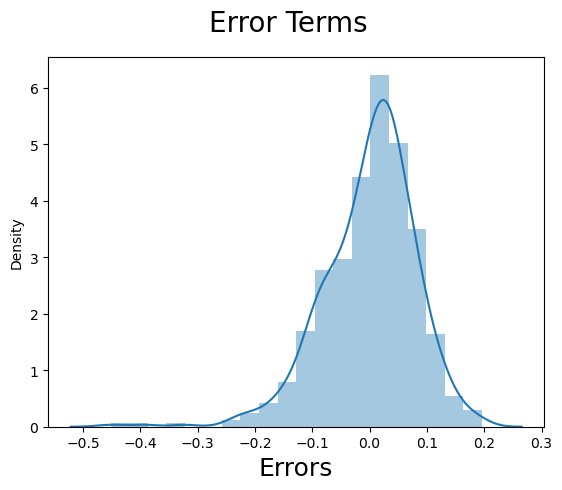

In [78]:
fig = plt.figure()
sns.distplot((y_train - y_train_cnt), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)    
plt.show()

## Predictions Using the Final Model

Now that we have fitted the model and checked the normality of error terms, it's time to go ahead and make predictions using the final model i.e. lr_all

### Applying the scaling on the test sets

In [79]:
num_vars = ['temp', 'atemp', 'hum', 'windspeed', 'casual','registered','cnt']

df_test[num_vars] = scaler.transform(df_test[num_vars])


In [80]:
df_test.describe()

yr  workingday        temp       atemp         hum   windspeed  \
count  219.000000  219.000000  219.000000  219.000000  219.000000  219.000000   
mean     0.479452    0.698630    0.558941    0.532991    0.638508    0.313350   
std      0.500722    0.459904    0.233698    0.217888    0.148974    0.159947   
min      0.000000    0.000000    0.046591    0.025950    0.261915   -0.042808   
25%      0.000000    0.000000    0.354650    0.344751    0.527265    0.198517   
50%      0.000000    1.000000    0.558691    0.549198    0.627737    0.299459   
75%      1.000000    1.000000    0.759096    0.714132    0.743928    0.403048   
max      1.000000    1.000000    0.984424    0.980934    1.002146    0.807474   

           casual  registered         cnt  weathersit_LightSnow  ...  \
count  219.000000  219.000000  219.000000            219.000000  ...   
mean     0.266372    0.527146    0.520592              0.027397  ...   
std      0.217246    0.217921    0.218435              0.163612  ...   
min      0.002133    0.059486    0.048205              0.000000  ...   
25%      0.101951    0.359154    0.377531              0.000000  ...   
50%      0.223712    0.526567    0.524275              0.000000  ...   
75%      0.362085    0.664742    0.672745              0.000000  ...   
max      1.038708    0.985273    0.963300              1.000000  ...   

         mnth_may    mnth_nov    mnth_oct    mnth_sep  weekday_mon  \
count  219.000000  219.000000  219.000000  219.000000   219.000000   
mean     0.086758    0.073059    0.082192    0.086758     0.146119   
std      0.282125    0.260830    0.275286    0.282125     0.354034   
min      0.000000    0.000000    0.000000    0.000000     0.000000   
25%      0.000000    0.000000    0.000000    0.000000     0.000000   
50%      0.000000    0.000000    0.000000    0.000000     0.000000   
75%      0.000000    0.000000    0.000000    0.000000     0.000000   
max      1.000000    1.000000    1.000000    1.000000     1.000000   

       weekday_sat  weekday_sun  weekday_thu  weekday_tue  weekday_wed  
count   219.000000   219.000000   219.000000   219.000000   219.000000  
mean      0.178082     0.118721     0.100457     0.127854     0.164384  
std       0.383458     0.324202     0.301297     0.334692     0.371472  
min       0.000000     0.000000     0.000000     0.000000     0.000000  
25%       0.000000     0.000000     0.000000     0.000000     0.000000  
50%       0.000000     0.000000     0.000000     0.000000     0.000000  
75%       0.000000     0.000000     0.000000     0.000000     0.000000  
max       1.000000     1.000000     1.000000     1.000000     1.000000  

[8 rows x 31 columns]

In [81]:
y_test = df_test.pop('cnt')
X_test = df_test

In [82]:
X_test_sm = sm.add_constant(X_test)

In [83]:
# Creating X_test_sub dataframe fetching values from X_test_sm

X_test_sub = X_test_sm[["const","yr","workingday","hum","windspeed","casual","season_spring","weekday_mon"
                      ,"season_winter"]]

In [84]:
y_pred_sm = lr_all.predict(X_test_sub)

Text(0, 0.5, 'y_pred')

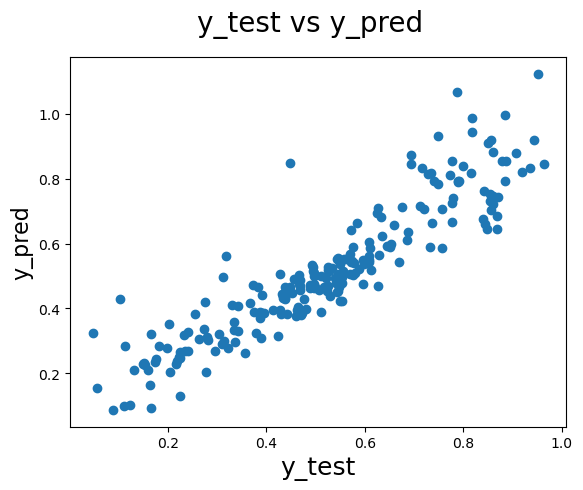

In [85]:
# Plotting y_test and y_pred to understand the spread

fig = plt.figure()
plt.scatter(y_test, y_pred_sm)
fig.suptitle('y_test vs y_pred', fontsize = 20)              # Plot heading 
plt.xlabel('y_test', fontsize = 18)                          # X-label
plt.ylabel('y_pred', fontsize = 16)     

## Model evaluation

In [86]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [87]:
r2 = r2_score(y_true=y_test, y_pred=y_pred_sm)
r2

0.828976603102613